In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from datetime import datetime

In [3]:
df=pd.read_csv(r"G:\datasets\IOT Datasets\traffic_timeSeries\train_ML_IOT.csv")

In [4]:
test=pd.read_csv(r"G:\datasets\IOT Datasets\traffic_timeSeries\test_ML_IOT.csv")

In [5]:
df.head(1)

DateTime  Junction  Vehicles           ID
0  2015-11-01 00:00:00         1        15  20151101001

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  48120 non-null  object
 1   Junction  48120 non-null  int64 
 2   Vehicles  48120 non-null  int64 
 3   ID        48120 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [7]:
test.head(1)

DateTime  Junction           ID
0  2017-07-01 00:00:00         1  20170701001

In [8]:
df.dtypes

DateTime    object
Junction     int64
Vehicles     int64
ID           int64
dtype: object

In [9]:
df['DateTime']=pd.to_datetime(df['DateTime'])

In [10]:
test['DateTime']=pd.to_datetime(test['DateTime'])

In [11]:
df.describe()

DateTime      Junction      Vehicles            ID
count                          48120  48120.000000  48120.000000  4.812000e+04
mean   2016-09-19 06:03:56.109725696      2.180549     22.791334  2.016330e+10
min              2015-11-01 00:00:00      1.000000      1.000000  2.015110e+10
25%              2016-04-16 01:45:00      1.000000      9.000000  2.016042e+10
50%              2016-09-30 03:30:00      2.000000     15.000000  2.016093e+10
75%              2017-02-25 16:00:00      3.000000     29.000000  2.017023e+10
max              2017-06-30 23:00:00      4.000000    180.000000  2.017063e+10
std                              NaN      0.966955     20.750063  5.944854e+06

In [12]:
df['DateTime'].describe()

count                            48120
mean     2016-09-19 06:03:56.109725696
min                2015-11-01 00:00:00
25%                2016-04-16 01:45:00
50%                2016-09-30 03:30:00
75%                2017-02-25 16:00:00
max                2017-06-30 23:00:00
Name: DateTime, dtype: object

In [13]:
df=df.drop(columns='ID')
test=test.drop(columns='ID')

In [14]:
df.isnull().sum()

DateTime    0
Junction    0
Vehicles    0
dtype: int64

In [15]:
test.isnull().sum()

DateTime    0
Junction    0
dtype: int64

In [16]:
df.duplicated().any()

False

In [17]:
test.duplicated().any()

False

In [18]:
df.head(2)

DateTime  Junction  Vehicles
0 2015-11-01 00:00:00         1        15
1 2015-11-01 01:00:00         1        13

<Axes: xlabel='Junction'>

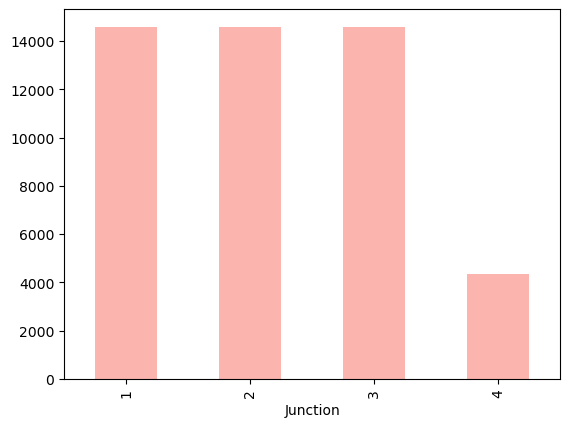

In [19]:
df['Junction'].value_counts().plot(kind='bar',cmap='Pastel1')

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 t

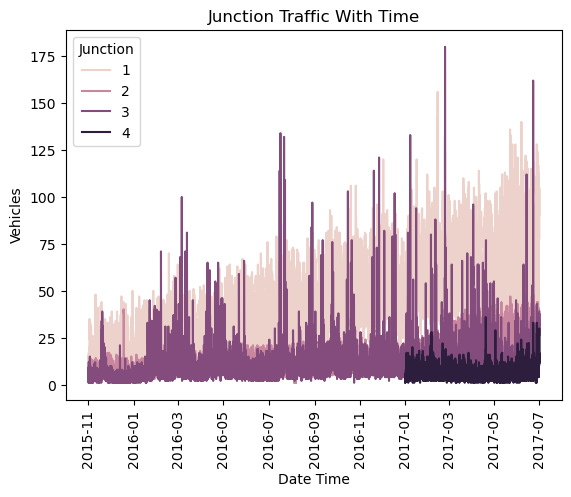

In [20]:
sns.lineplot(x='DateTime',y='Vehicles',data=df,hue='Junction')
plt.title('Junction Traffic With Time')
plt.xlabel('Date Time')
plt.ylabel('Vehicles')
plt.xticks(rotation=90)
plt.show()

In [21]:
def print_junc_count(df):
    num=df['Junction'].unique()
    for x in num:
        new_df=df[df['Junction']==x]
        plt.figure(figsize=(20,10))  
        sns.lineplot(x='DateTime',y='Vehicles',data=new_df)
        plt.title(f'Plot for Junction {x}')
        plt.xticks(rotation=90)
        plt.show()

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


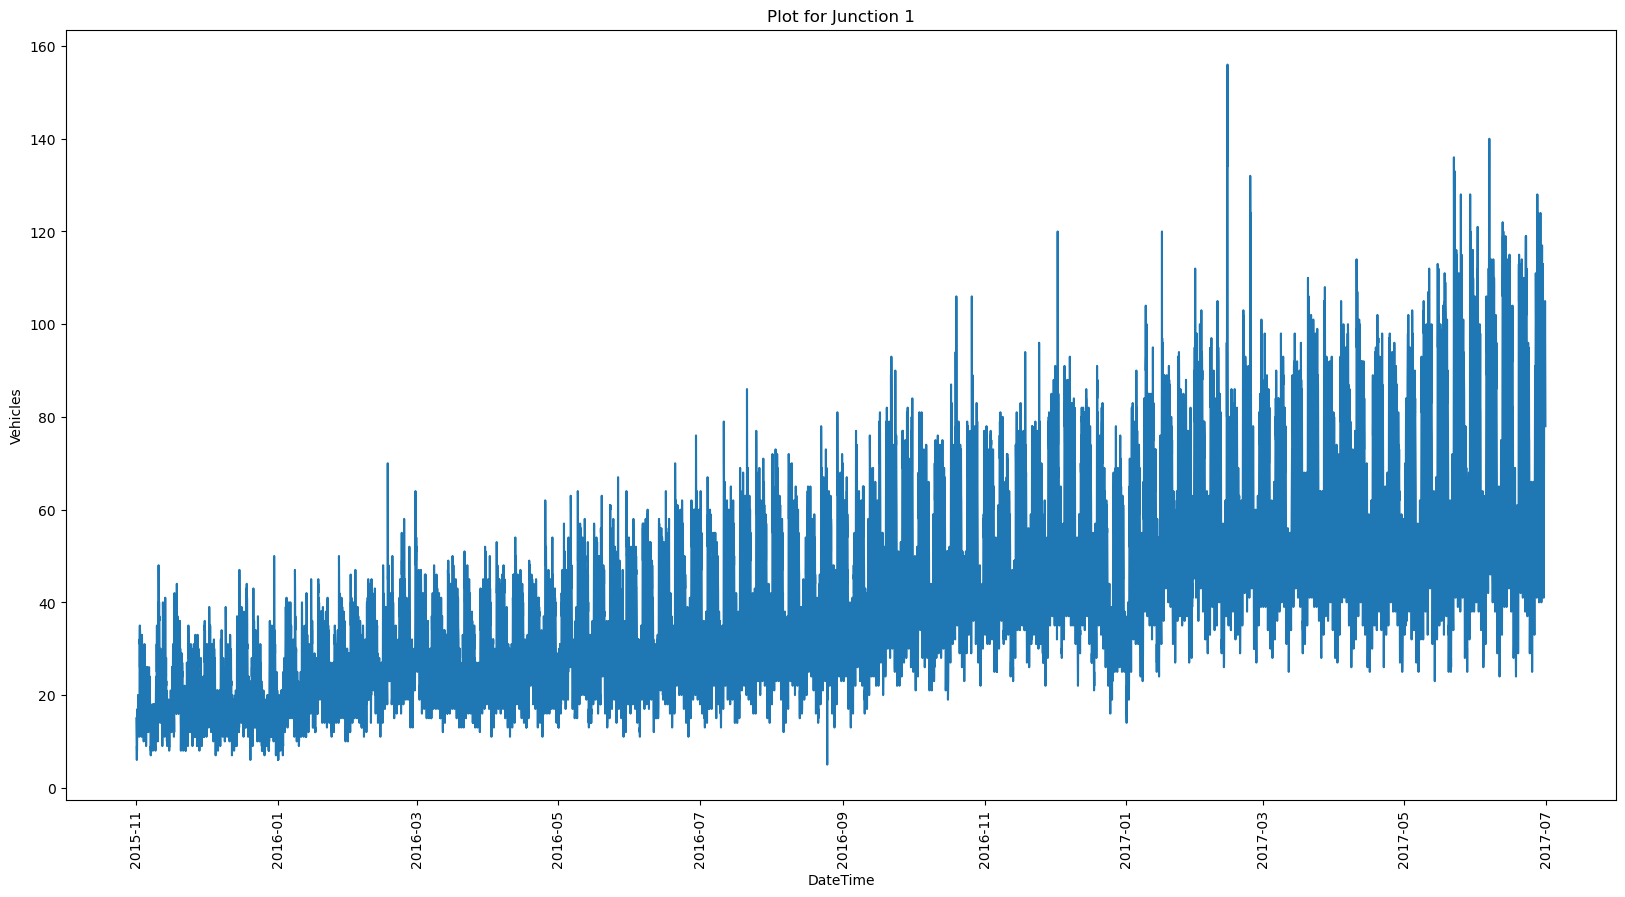

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


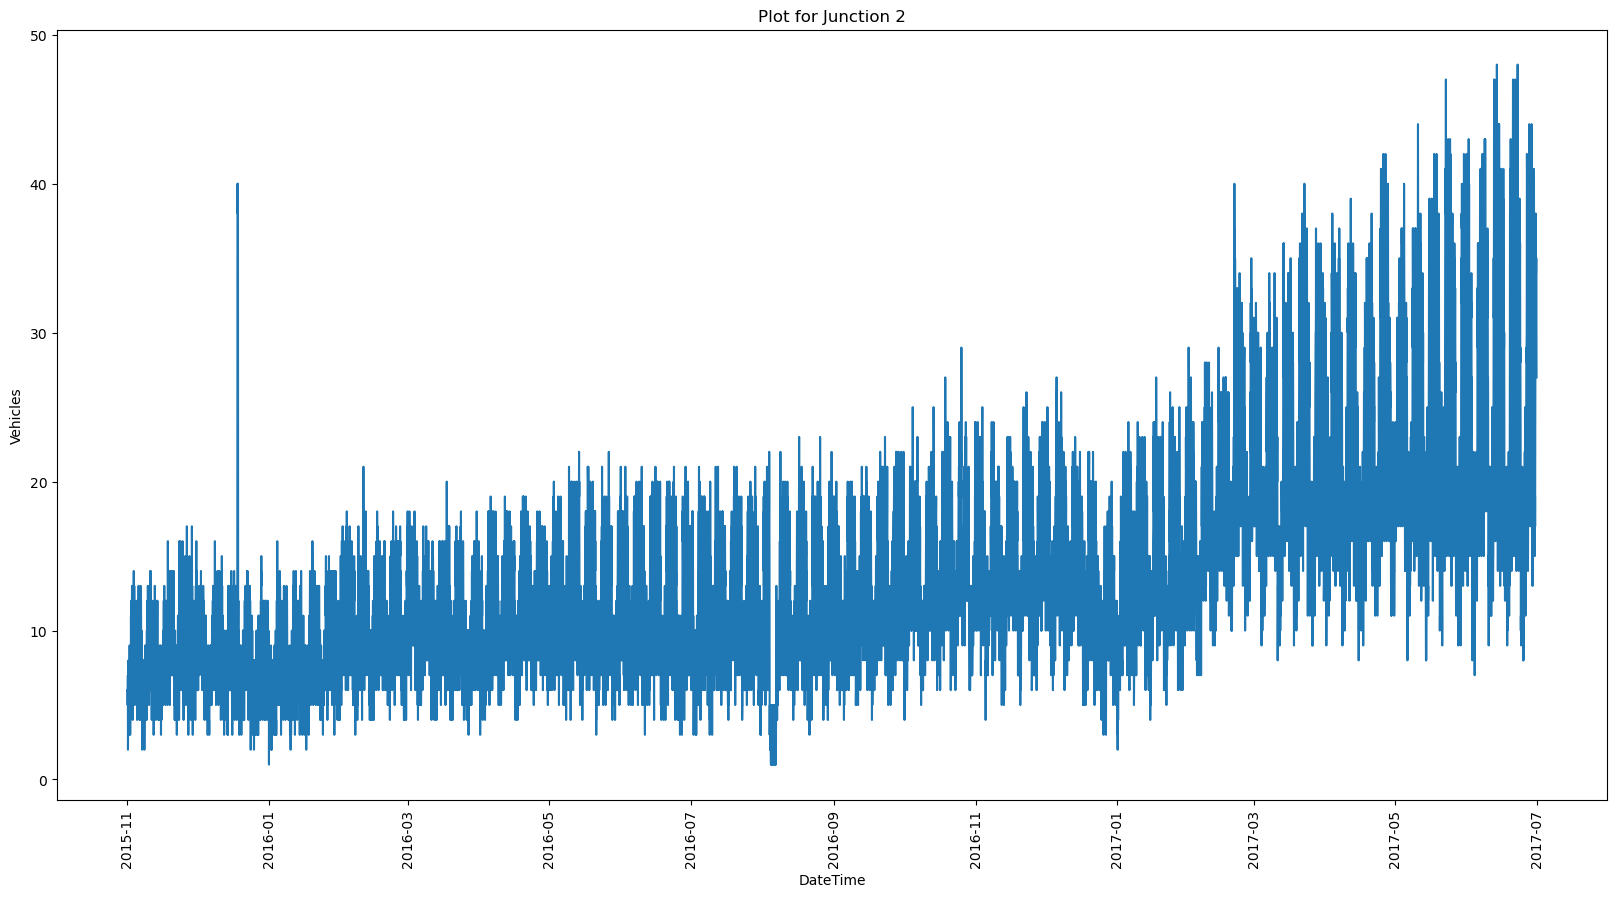

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


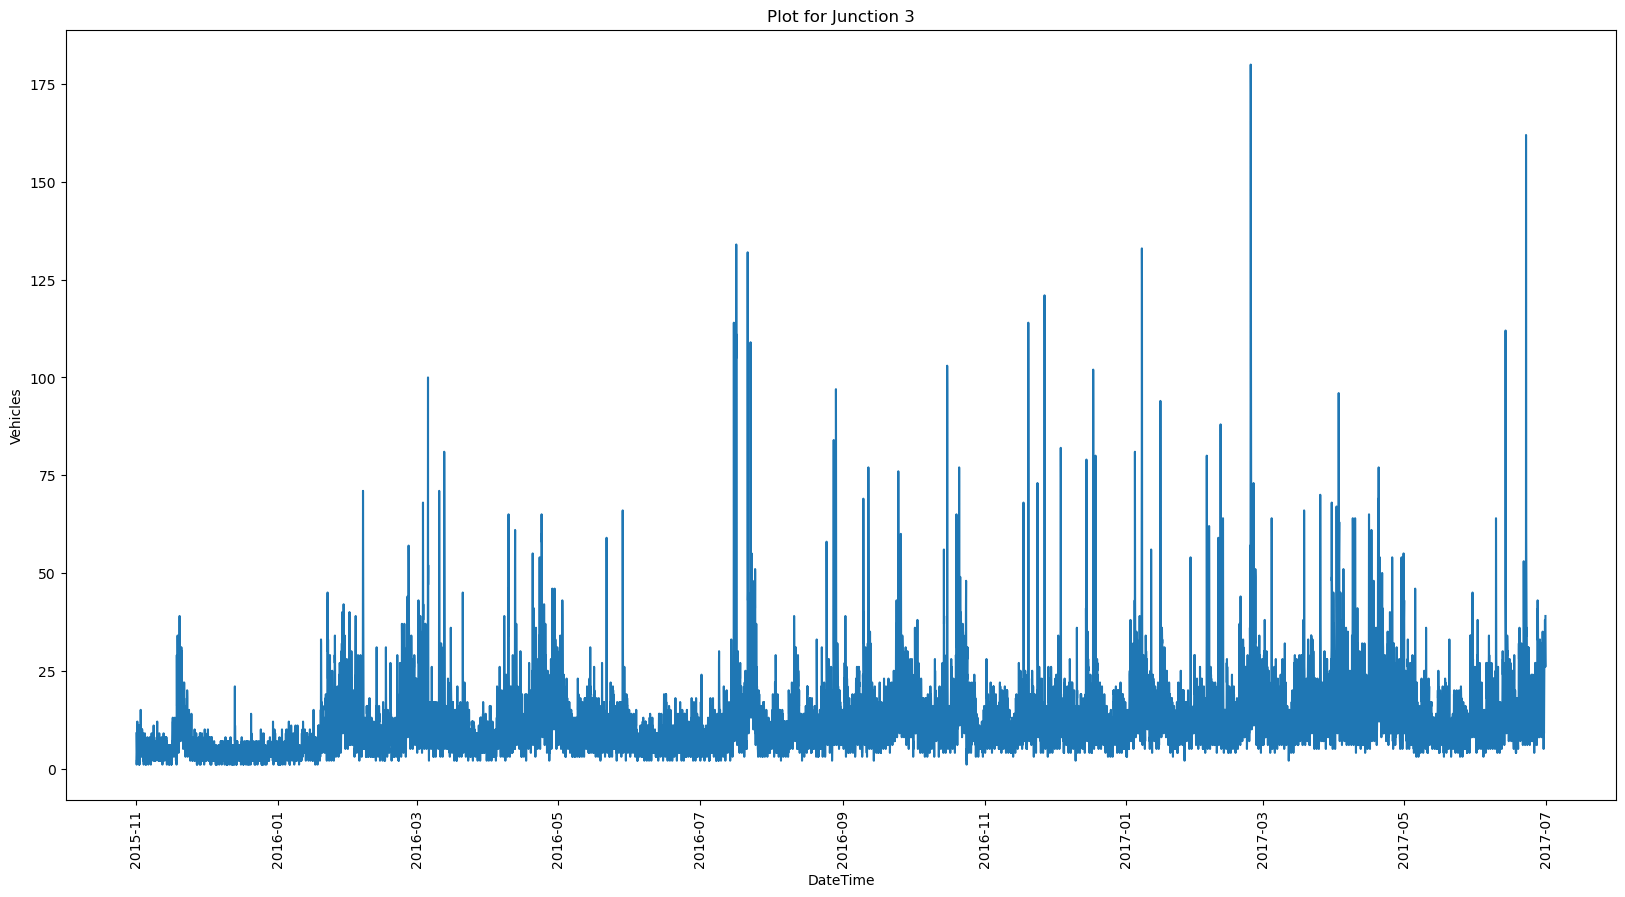

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


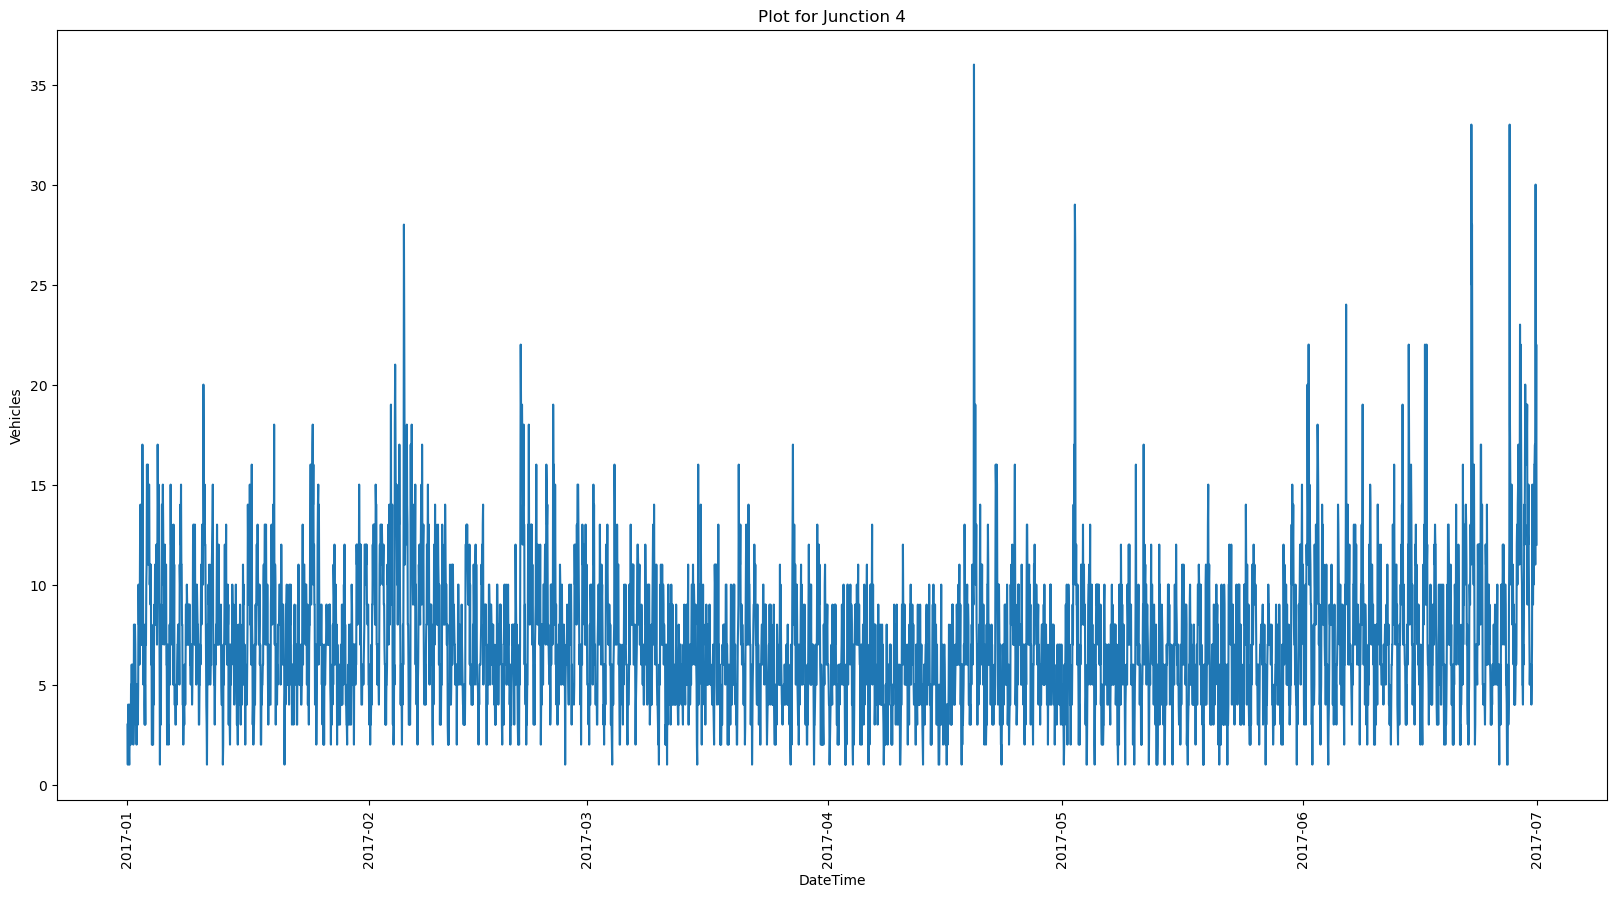

In [22]:
print_junc_count(df)

In [23]:
df['year']=df['DateTime'].dt.year
df['month']=df['DateTime'].dt.month
df['date']=df['DateTime'].dt.day
df['hour']=df['DateTime'].dt.hour
df['day']=df['DateTime'].dt.dayofweek

In [24]:
test['year']=test['DateTime'].dt.year
test['month']=test['DateTime'].dt.month
test['date']=test['DateTime'].dt.day
test['hour']=test['DateTime'].dt.hour
test['day']=test['DateTime'].dt.dayofweek

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 t

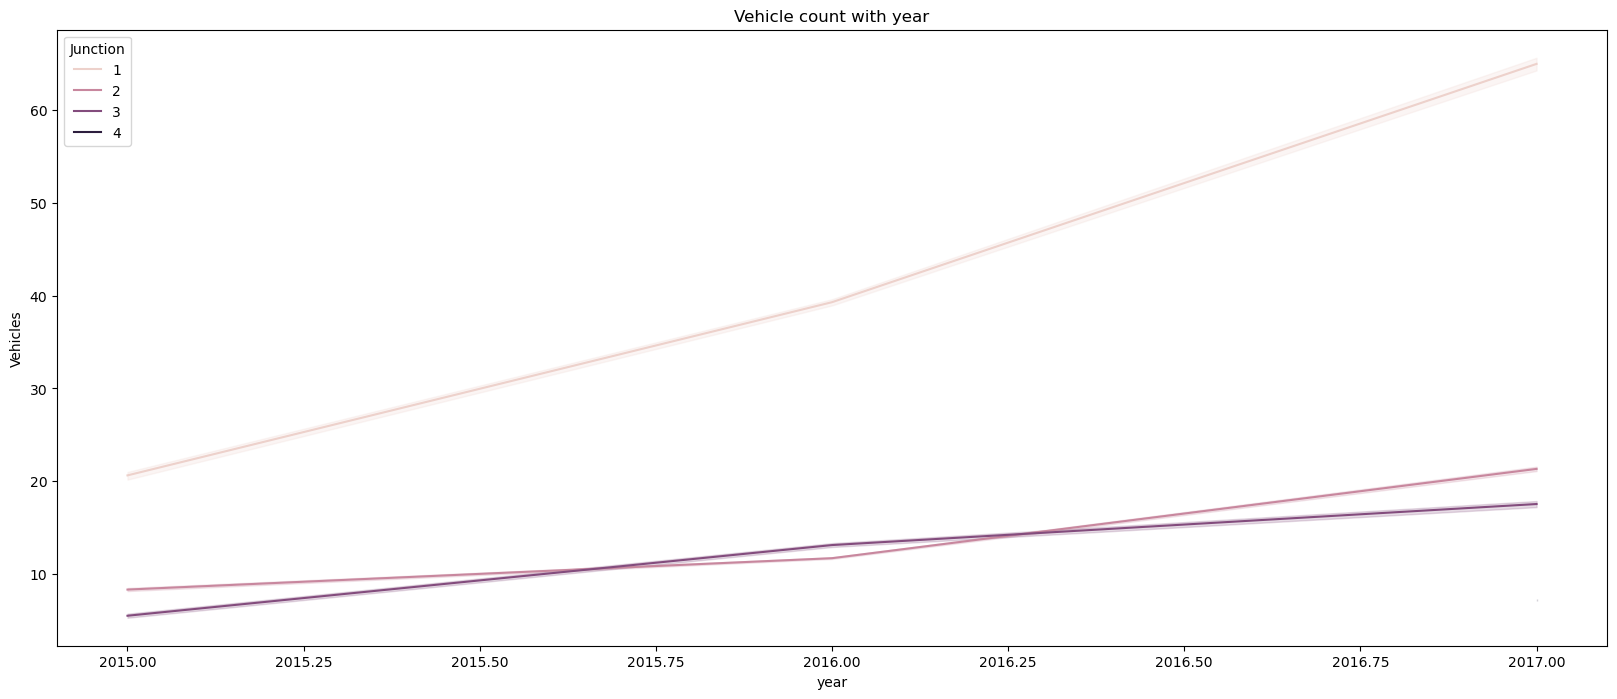

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 t

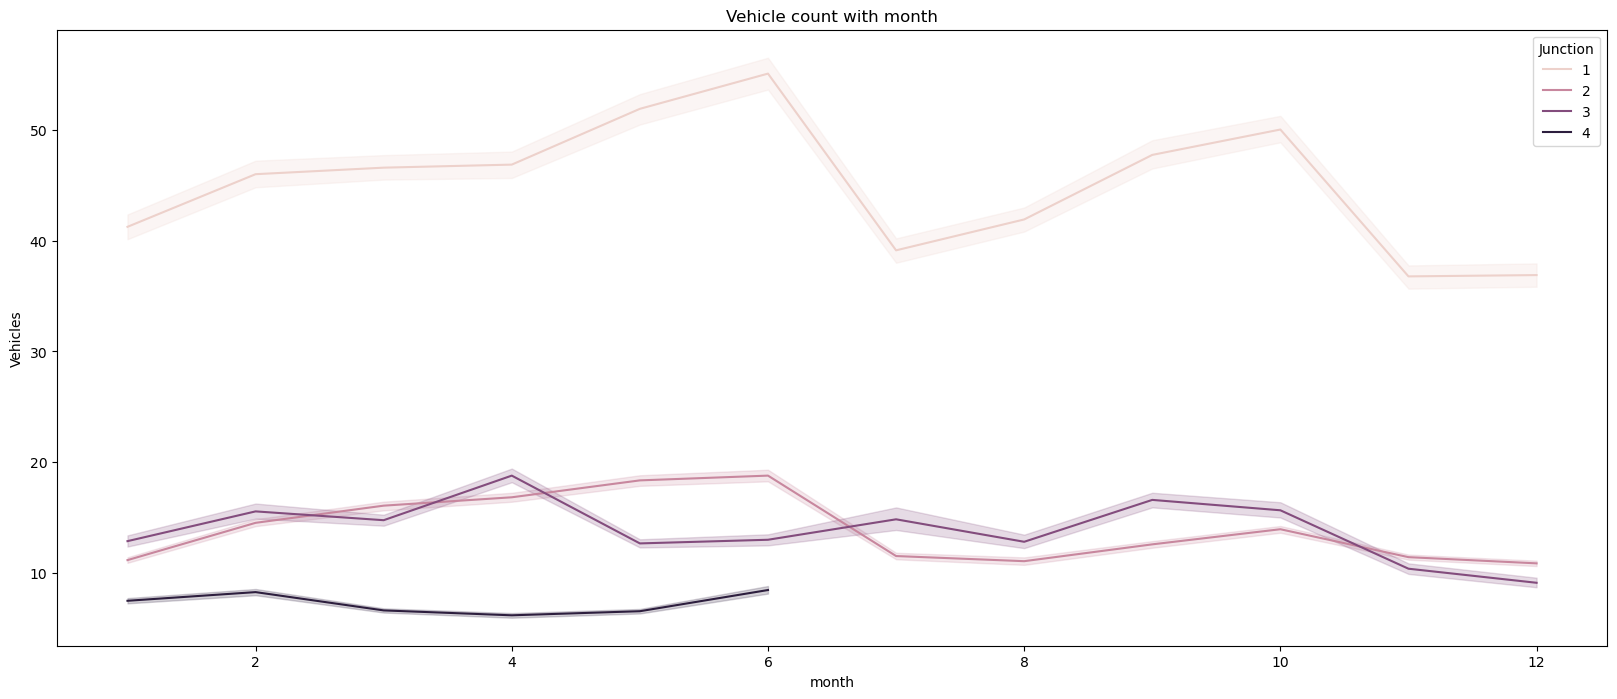

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 t

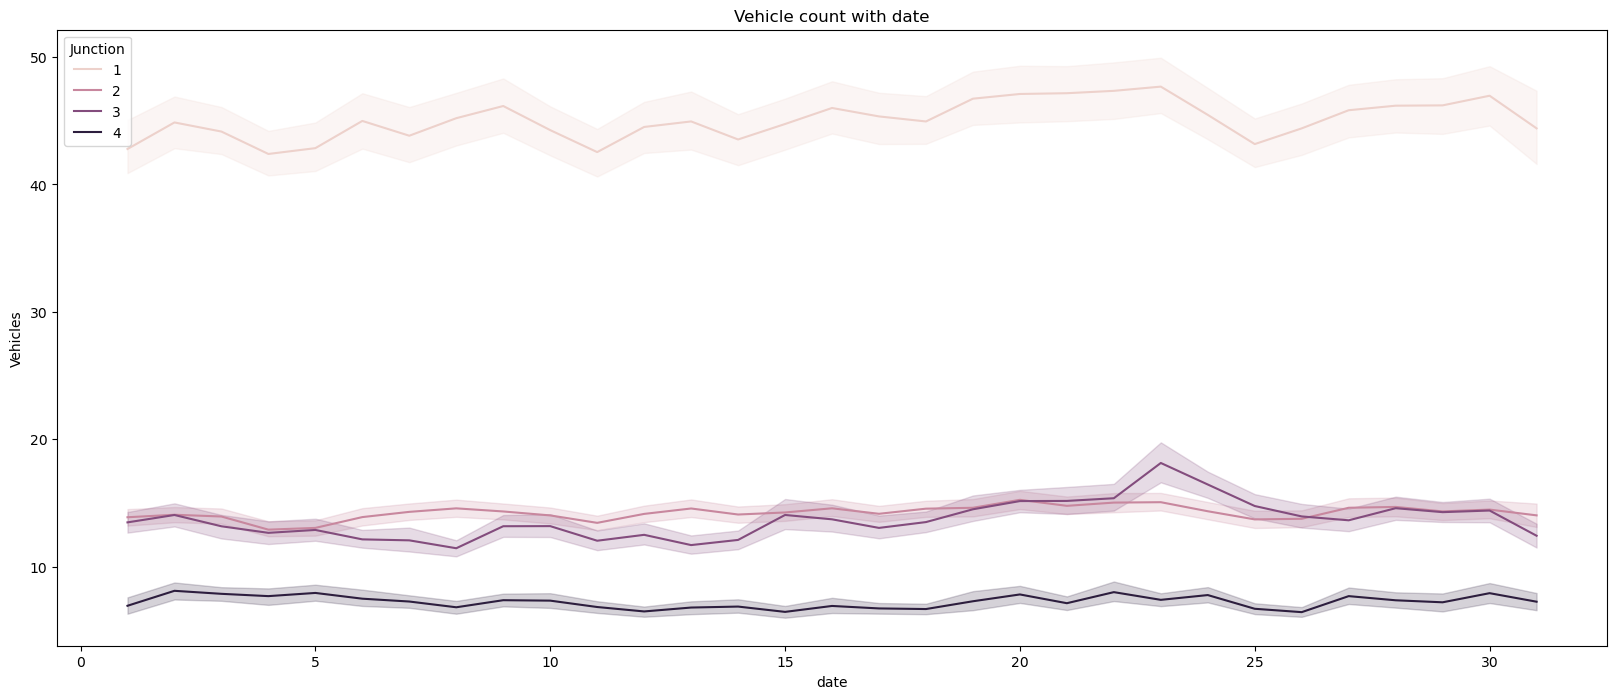

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 t

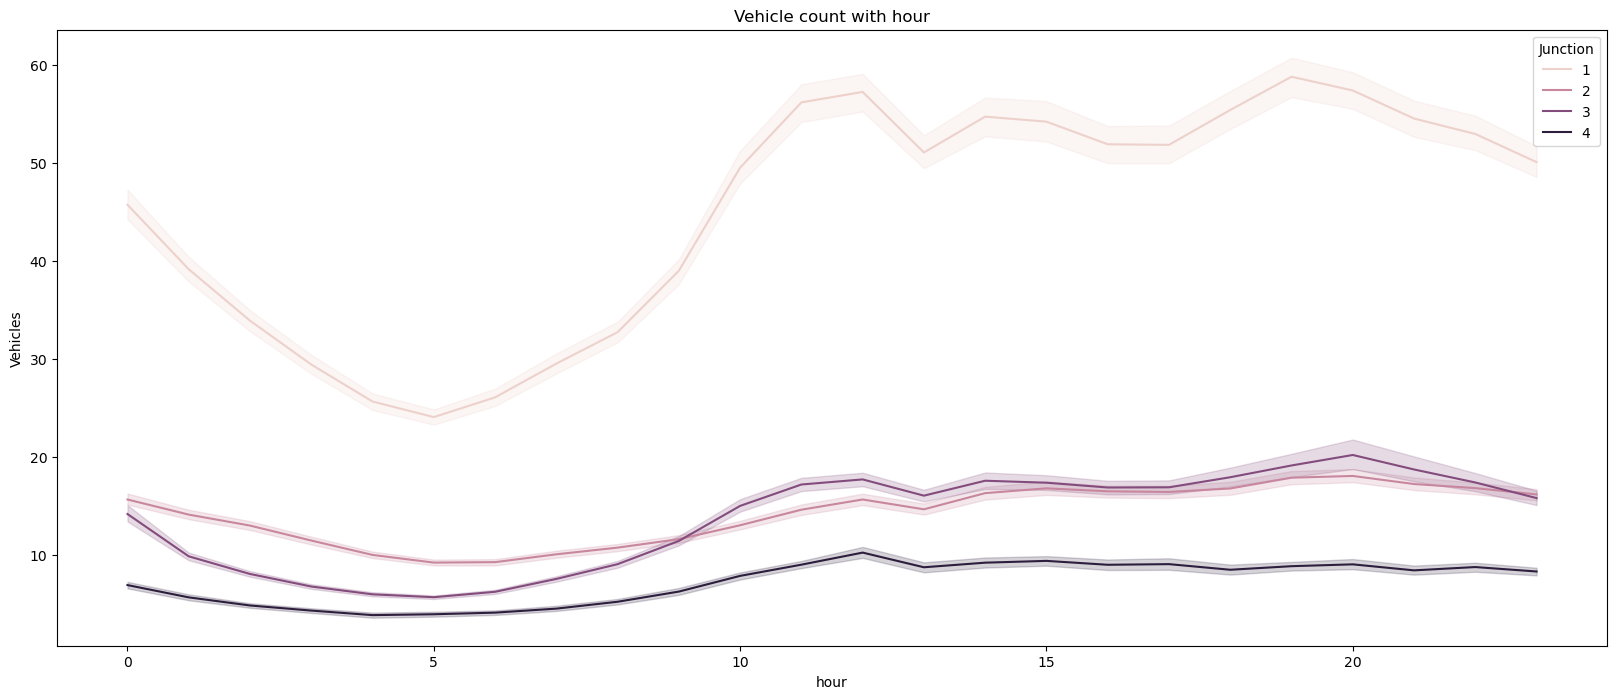

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 t

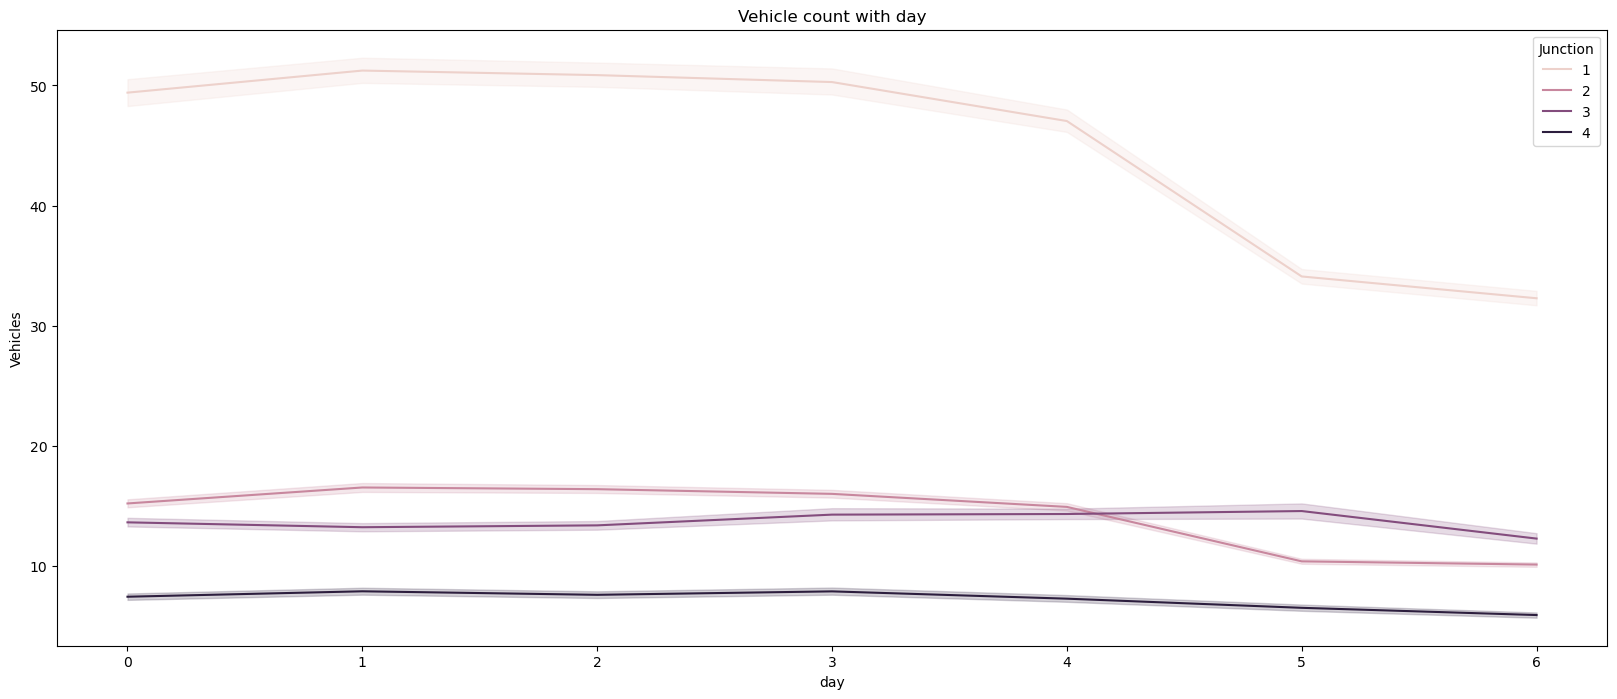

In [25]:
for i in ['year','month','date','hour','day']:
    plt.figure(figsize=(20,8))
    sns.lineplot(x=df[i],y=df['Vehicles'],data=df,hue='Junction')
    plt.title(f'Vehicle count with {i}')
    plt.show()

<Axes: xlabel='year', ylabel='count'>

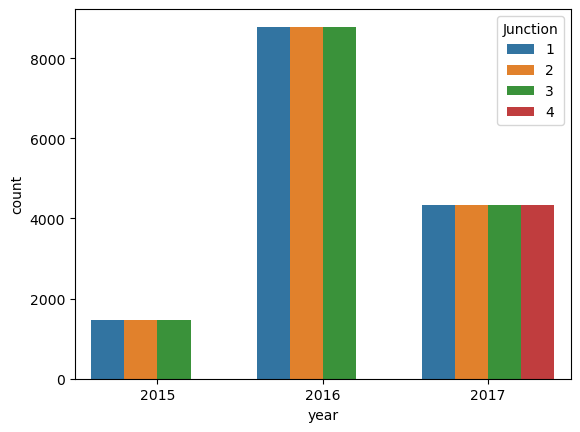

In [26]:
sns.countplot(data=df,x=df['year'],hue='Junction')

<Axes: >

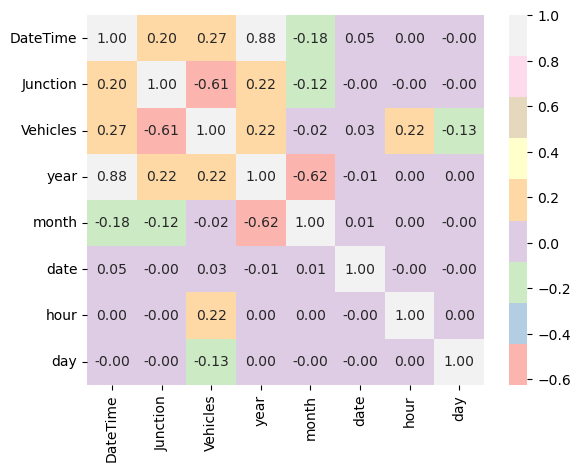

In [27]:
sns.heatmap(df.corr(),annot=True,fmt='0.2f',cmap='Pastel1')

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is depr

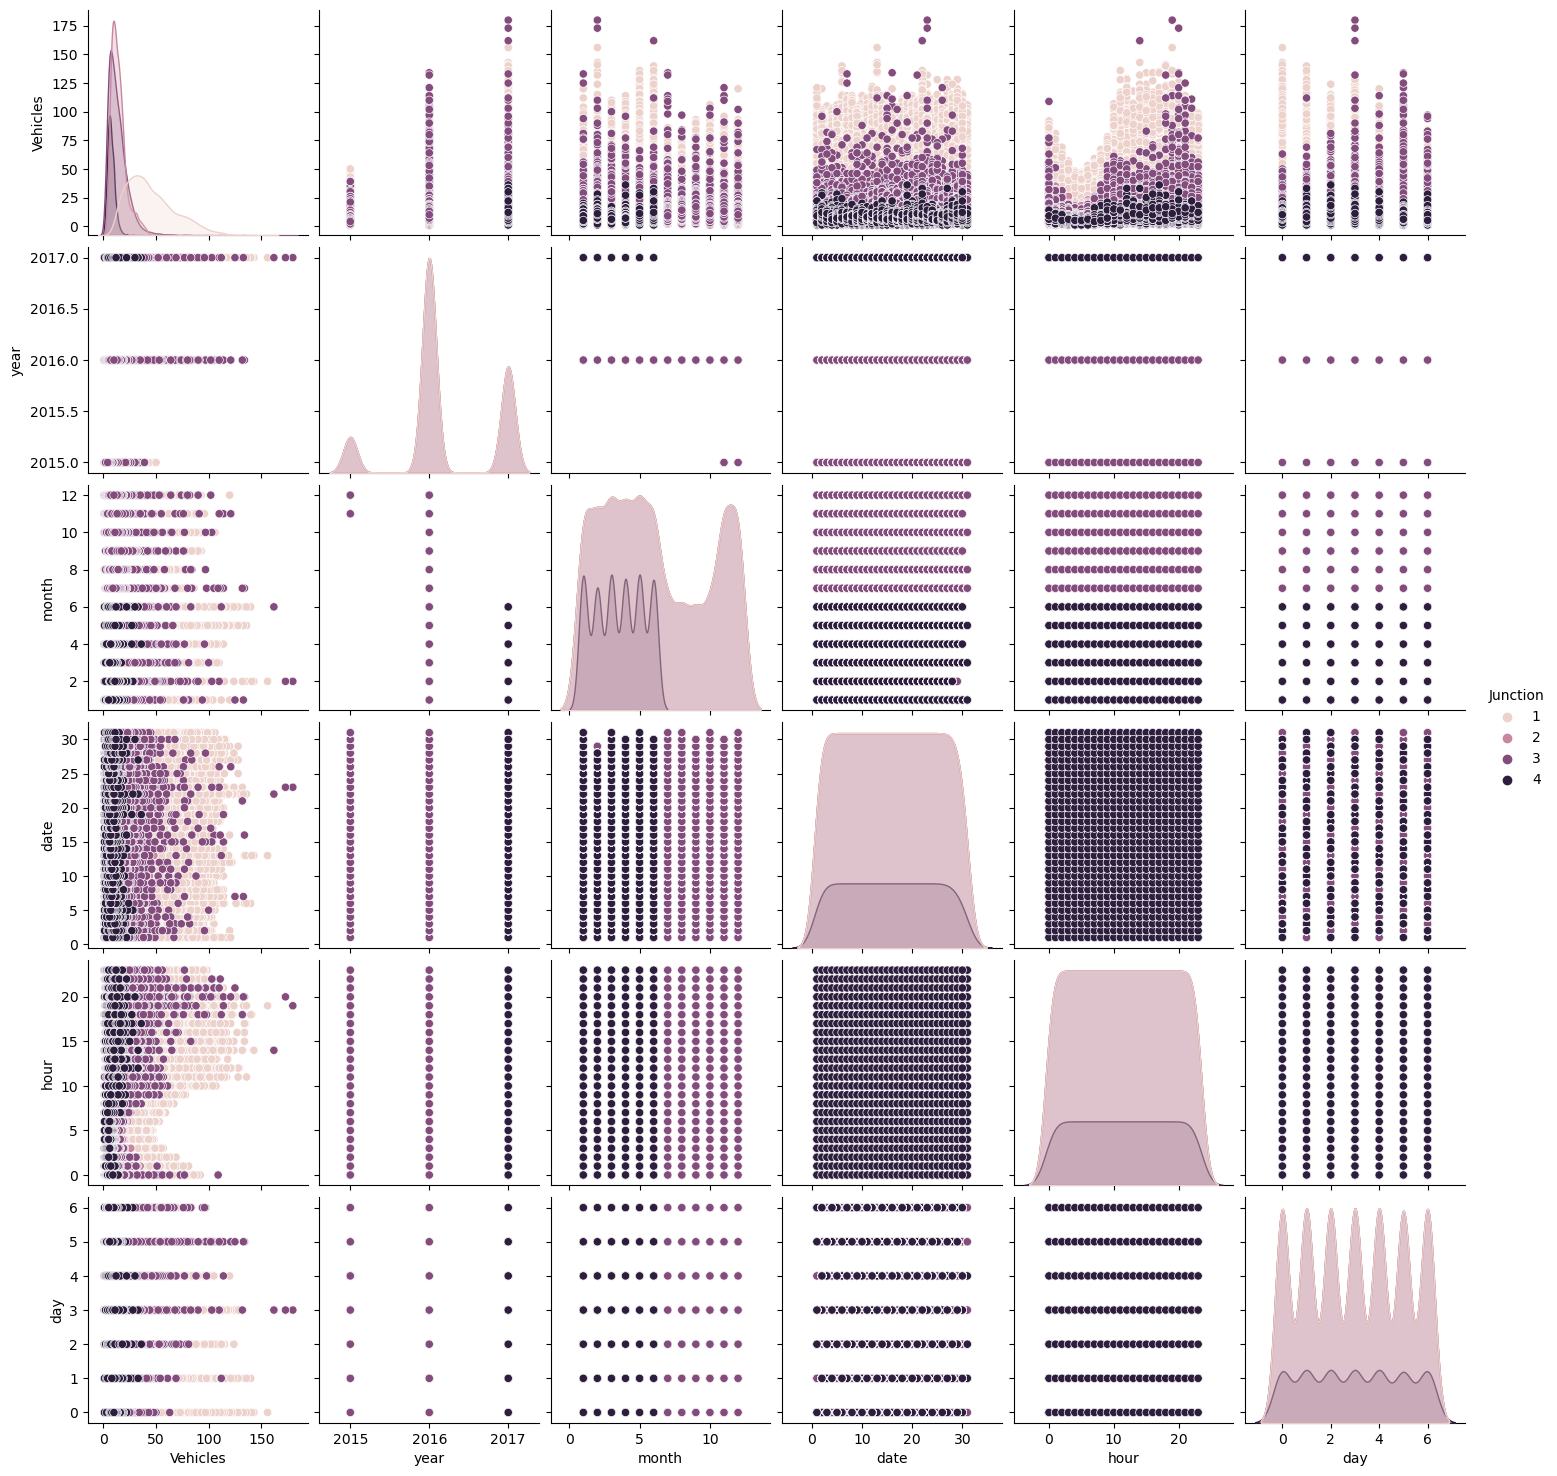

In [28]:
sns.pairplot(data=df,hue='Junction')

In [29]:
new_df=pd.pivot_table(df,columns='Junction',values='Vehicles',index='DateTime')

In [30]:
new_df.head()

Junction                1    2    3   4
DateTime                               
2015-11-01 00:00:00  15.0  6.0  9.0 NaN
2015-11-01 01:00:00  13.0  6.0  7.0 NaN
2015-11-01 02:00:00  10.0  5.0  5.0 NaN
2015-11-01 03:00:00   7.0  6.0  1.0 NaN
2015-11-01 04:00:00   9.0  7.0  2.0 NaN

In [31]:
df1=new_df[[1]]
df2=new_df[[2]]
df3=new_df[[3]]
df4=new_df[[4]]

In [32]:
df4.isnull().sum()

Junction
4    10248
dtype: int64

In [33]:
df4=df4.dropna()

In [34]:
df4.shape

(4344, 1)

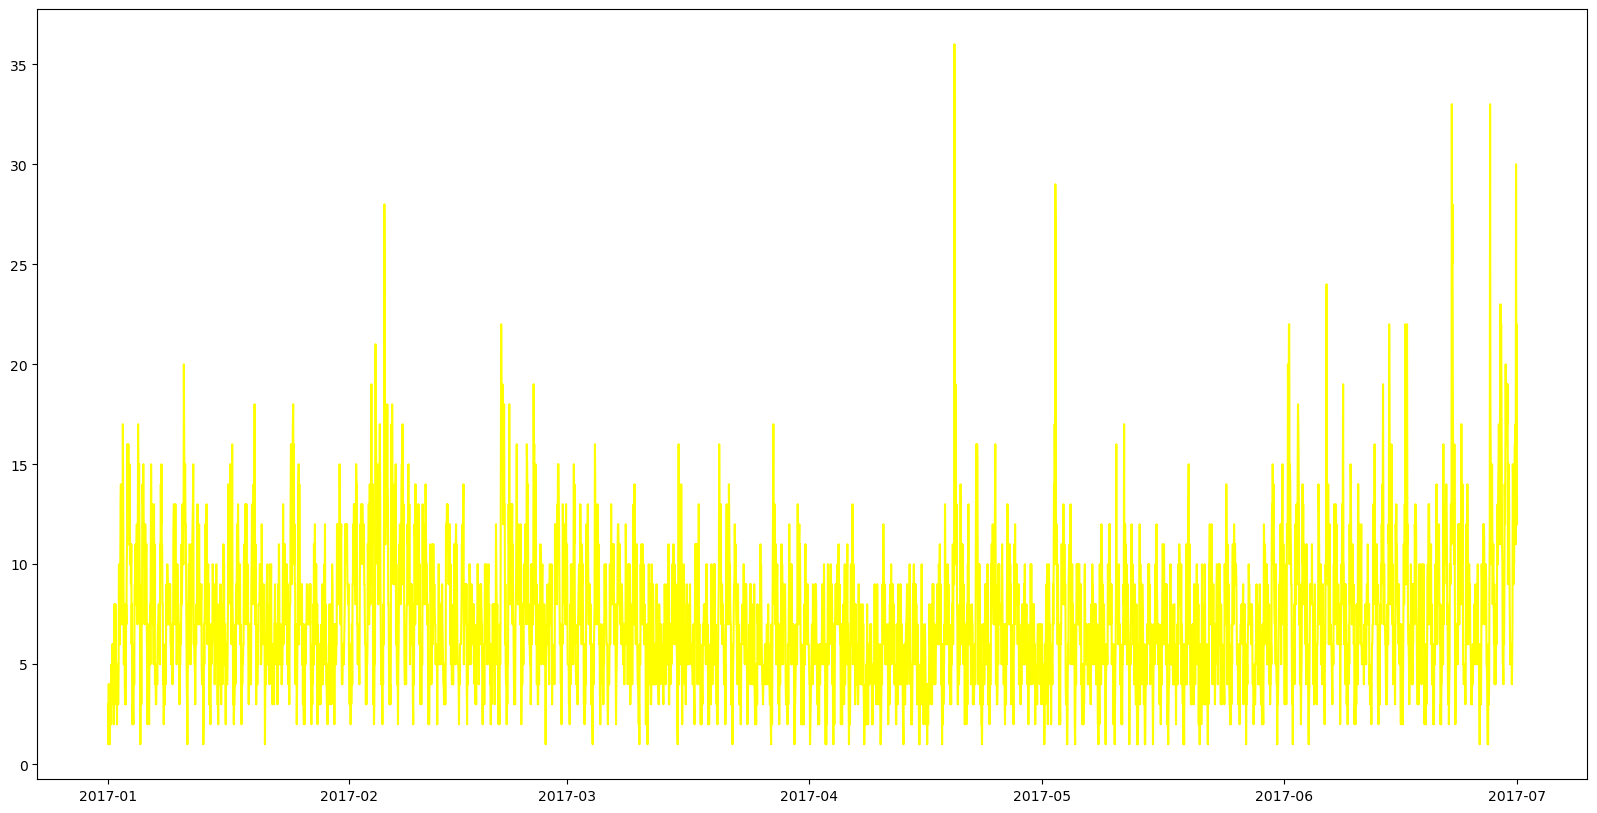

In [35]:
plt.figure(figsize=(20,10))
plt.plot(df4,color='yellow')


KeyError: 0

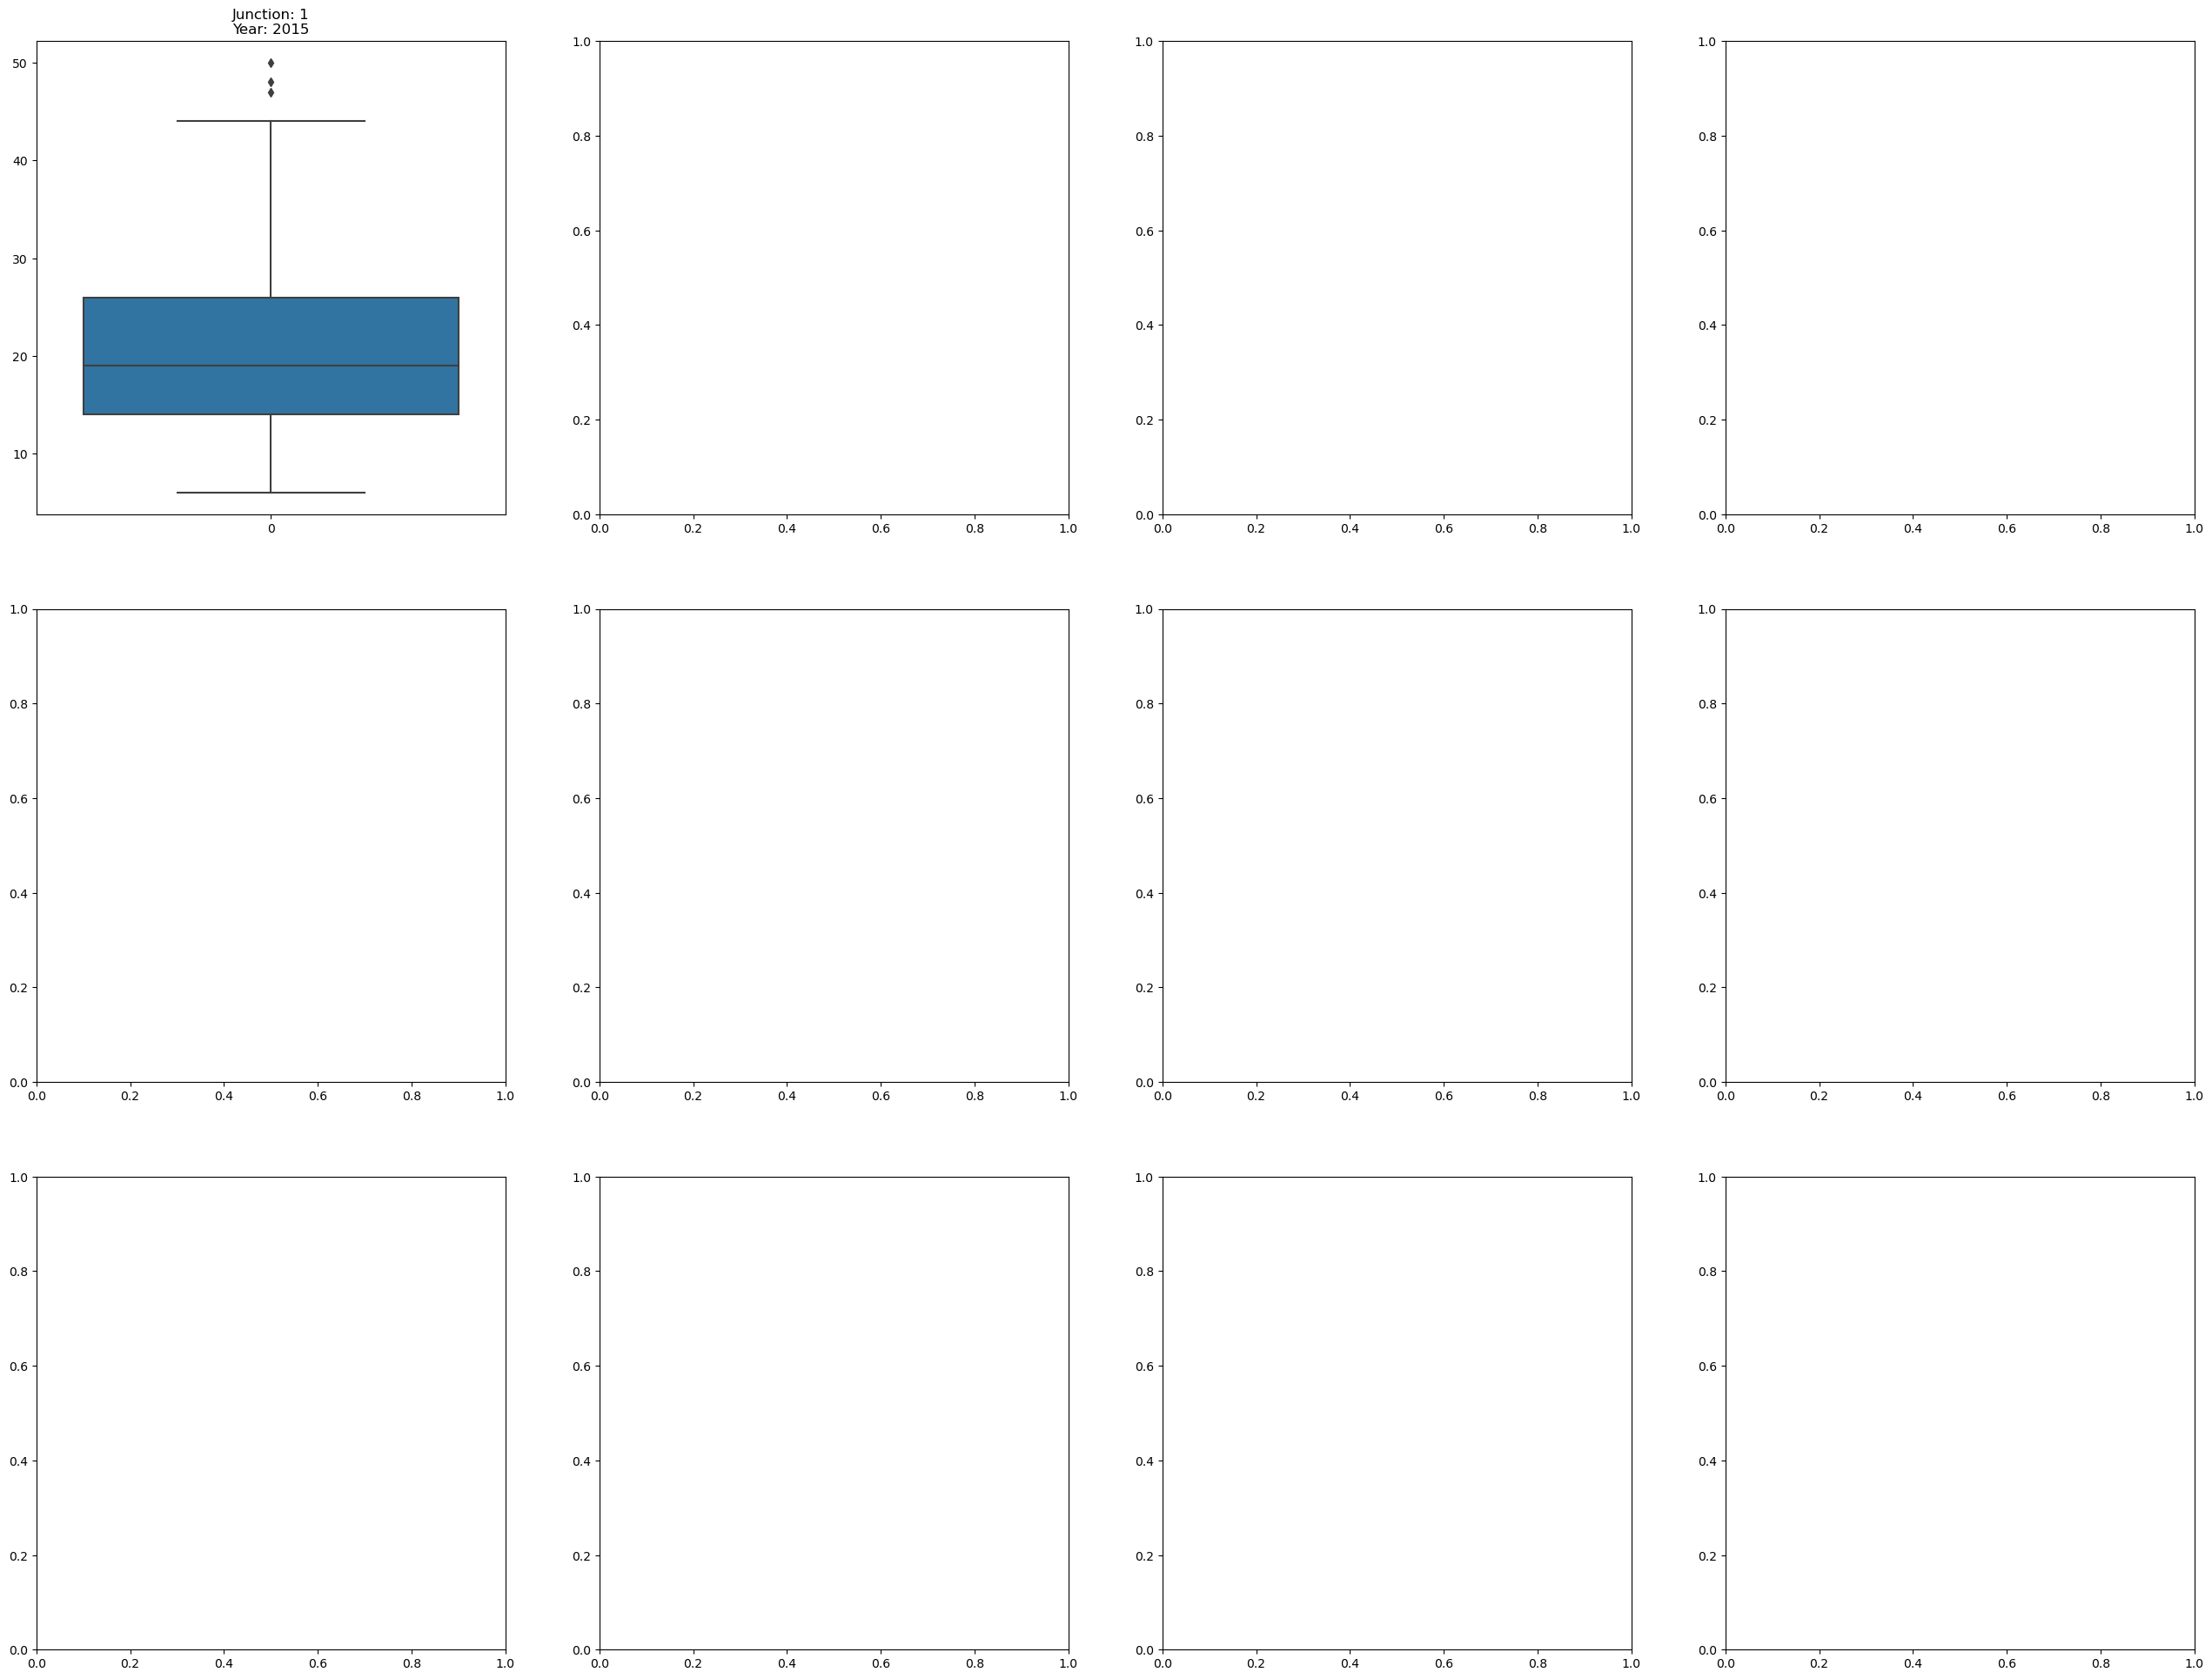

In [36]:
fig,axis=plt.subplots(3,4,figsize=(32,24))

for i,year in zip([0,1,2],[2015,2016,2017]):
    for j,junction in zip([0,1,2,3],[1,2,3,4]):
        sns.boxplot(df[(df['Junction']==junction)&(df['year']==year)]['Vehicles'],ax=axis[i,j])
        axis[i,j].set_title(f'Junction: {junction}\nYear: {year}')

In [ ]:
def outlier_removal(df,i):
    mean=df[i].mean()
    std=df[i].std()
    value=mean+(3*std)
    return df[df<value].dropna()
    

In [ ]:
df1=outlier_removal(df1,1)

In [ ]:
df2=outlier_removal(df2,2)

In [ ]:
df3=outlier_removal(df3,3)

In [ ]:
df4=outlier_removal(df4,4)

In [ ]:
dfs=[df1,df2,df3,df4]

In [ ]:
for i,df in zip([1,2,3,4],dfs):
    df=df.reset_index()
    df['year']=df['DateTime'].dt.year
    for year in [2015,2016,2017]:
        sns.boxplot(df[df['year']==year][i])
        plt.title(f'{i}+{year}')
        plt.show()

In [ ]:
def norm(df,col):
    avg=df[col].mean()
    std=df[col].std()
    df_norm=(df[col]-avg)/std
    return df_norm.to_frame()

In [ ]:
df1=norm(df1,1)

In [ ]:
df2=norm(df2,2)

In [ ]:
df3=norm(df3,3)

In [ ]:
df4=norm(df4,4)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_3408\3473098423.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Density'>

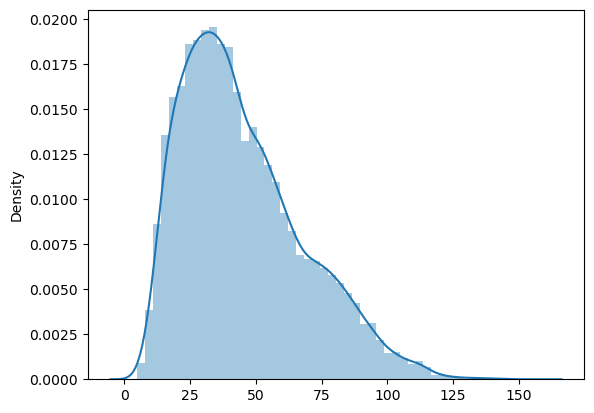

In [37]:
sns.distplot(df1)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_3408\447768823.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Density'>

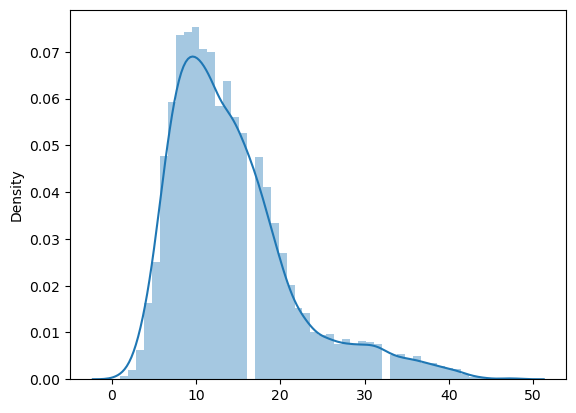

In [38]:
sns.distplot(df2)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_3408\2311342665.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df3)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Density'>

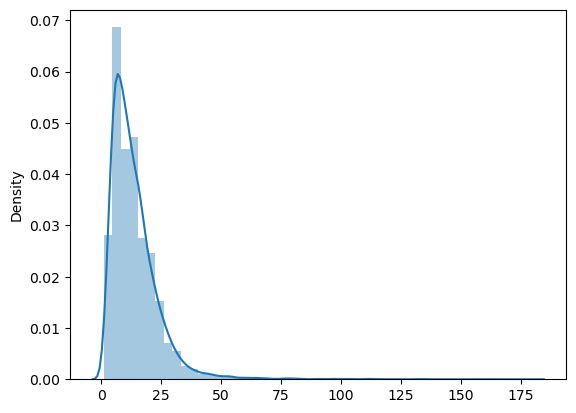

In [39]:
sns.distplot(df3)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_3408\373777677.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df4)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Density'>

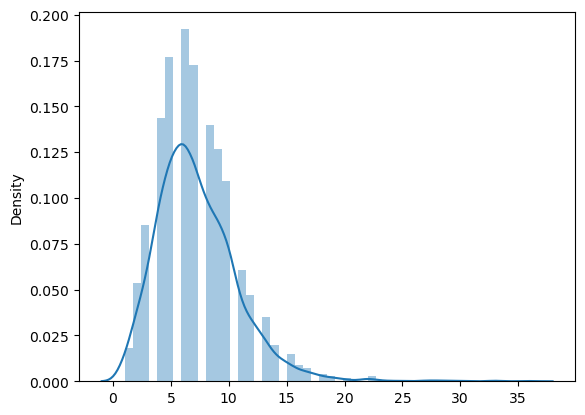

In [40]:
sns.distplot(df4)

In [41]:
def plot(df,col):
    df=df.reset_index()
    df['year']=df['DateTime'].dt.year
    years=[2015,2016,2017]
    for y in years:
        plt.figure(figsize=(20,10))
        sns.lineplot(df[df['year']==y][col])
        plt.title(f'Lineplot for year {y}')
        plt.show()

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


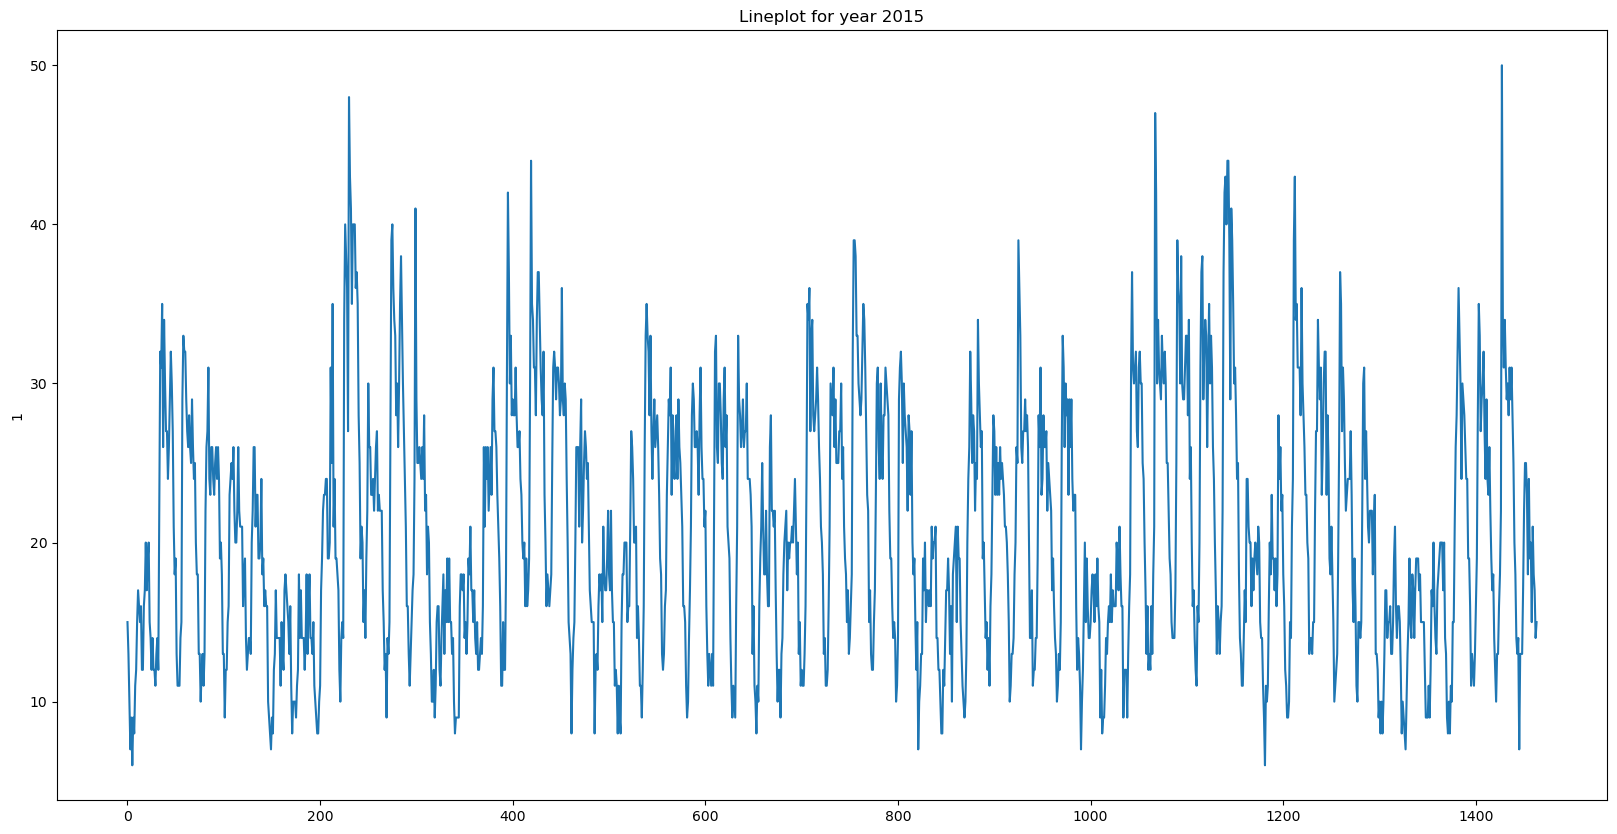

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


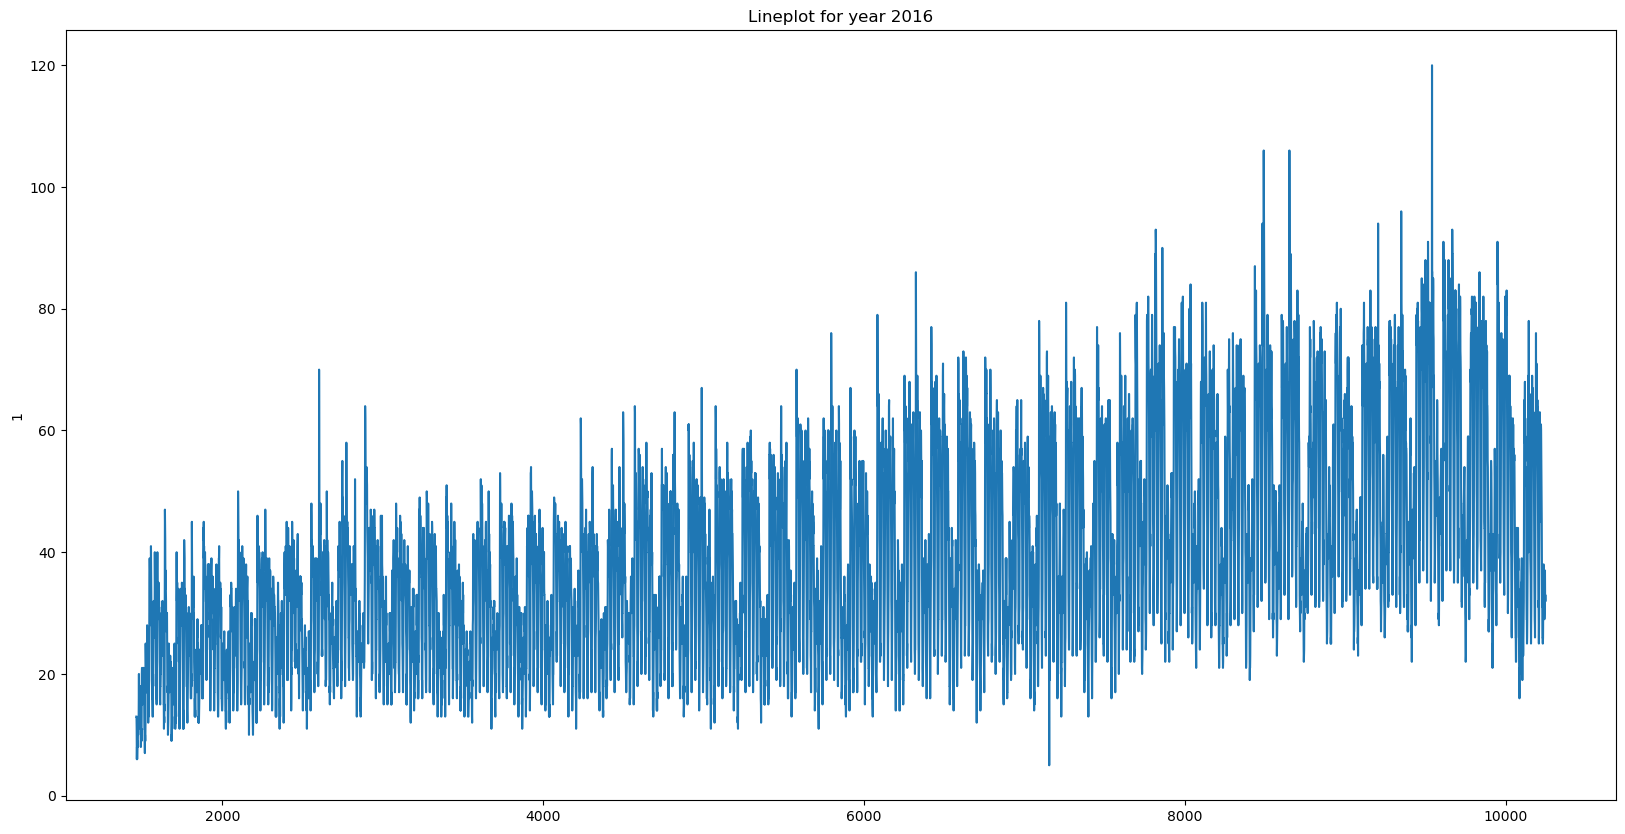

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


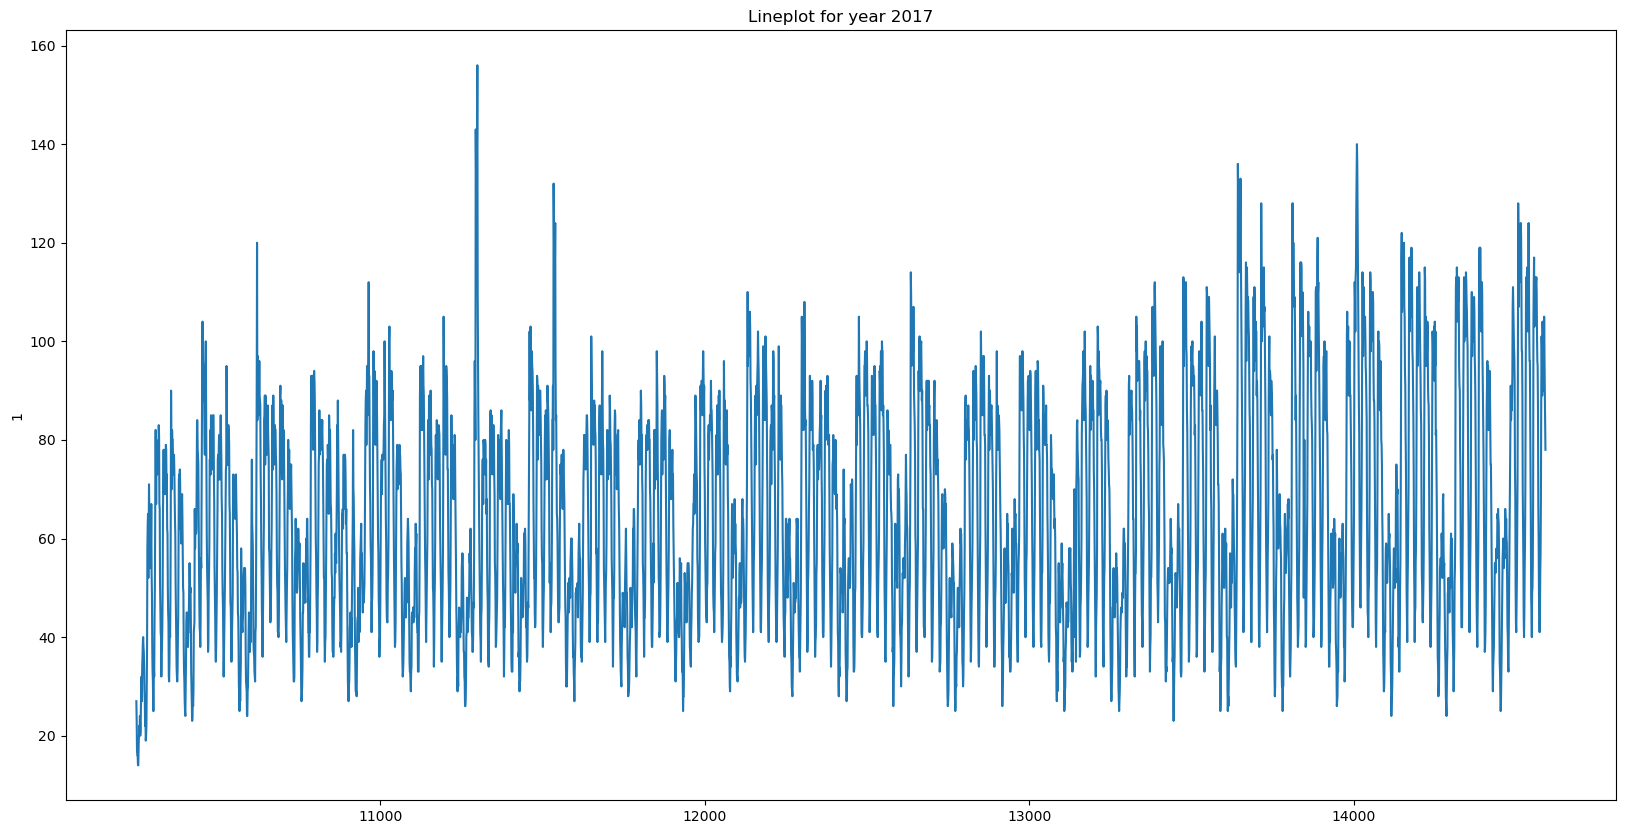

In [42]:
plot(df1,1)

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


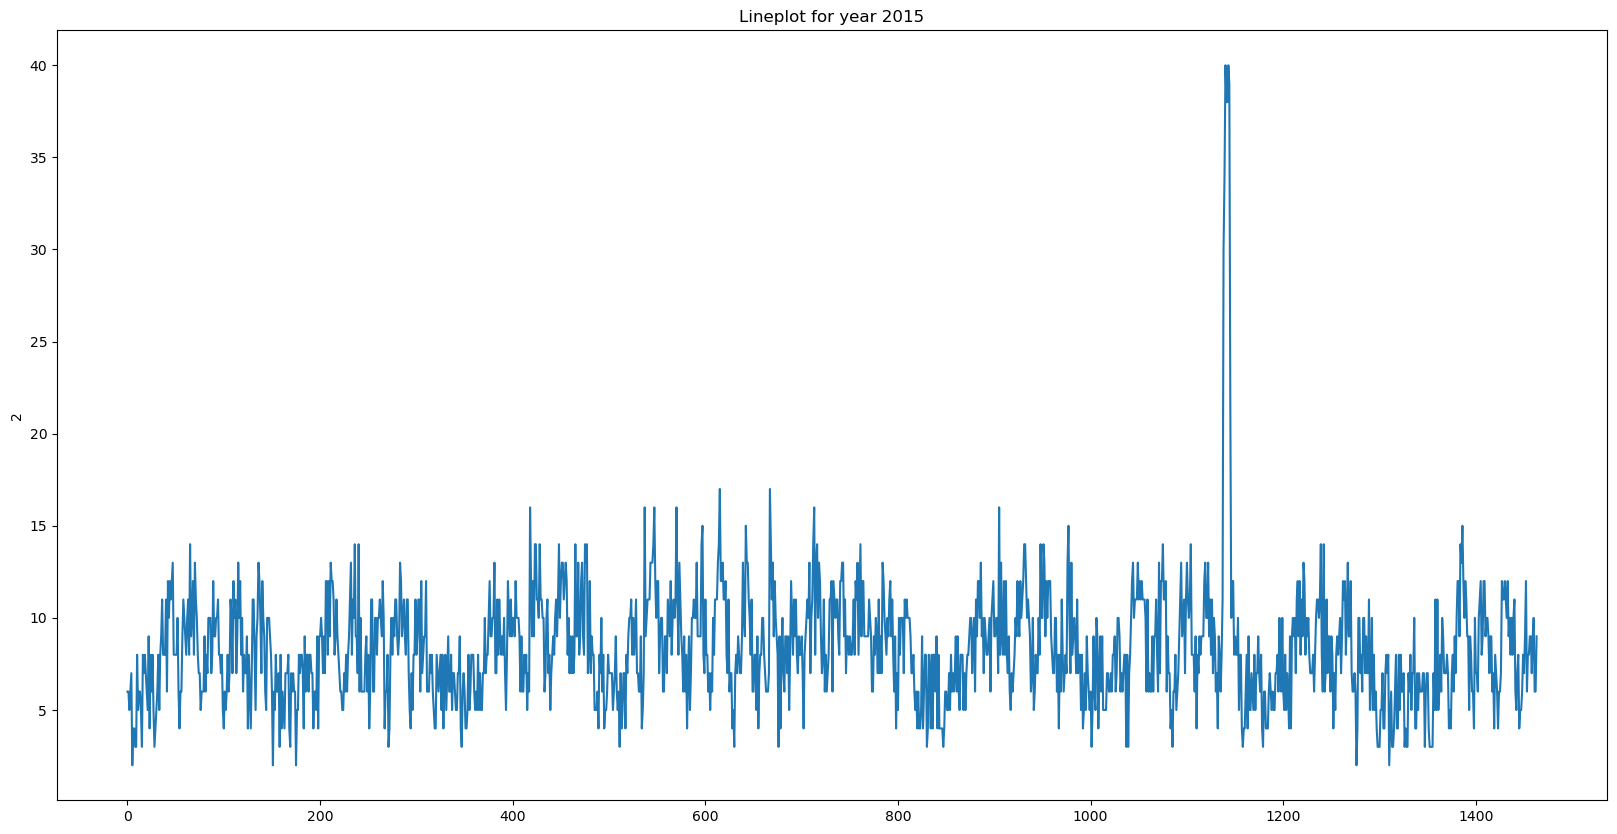

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


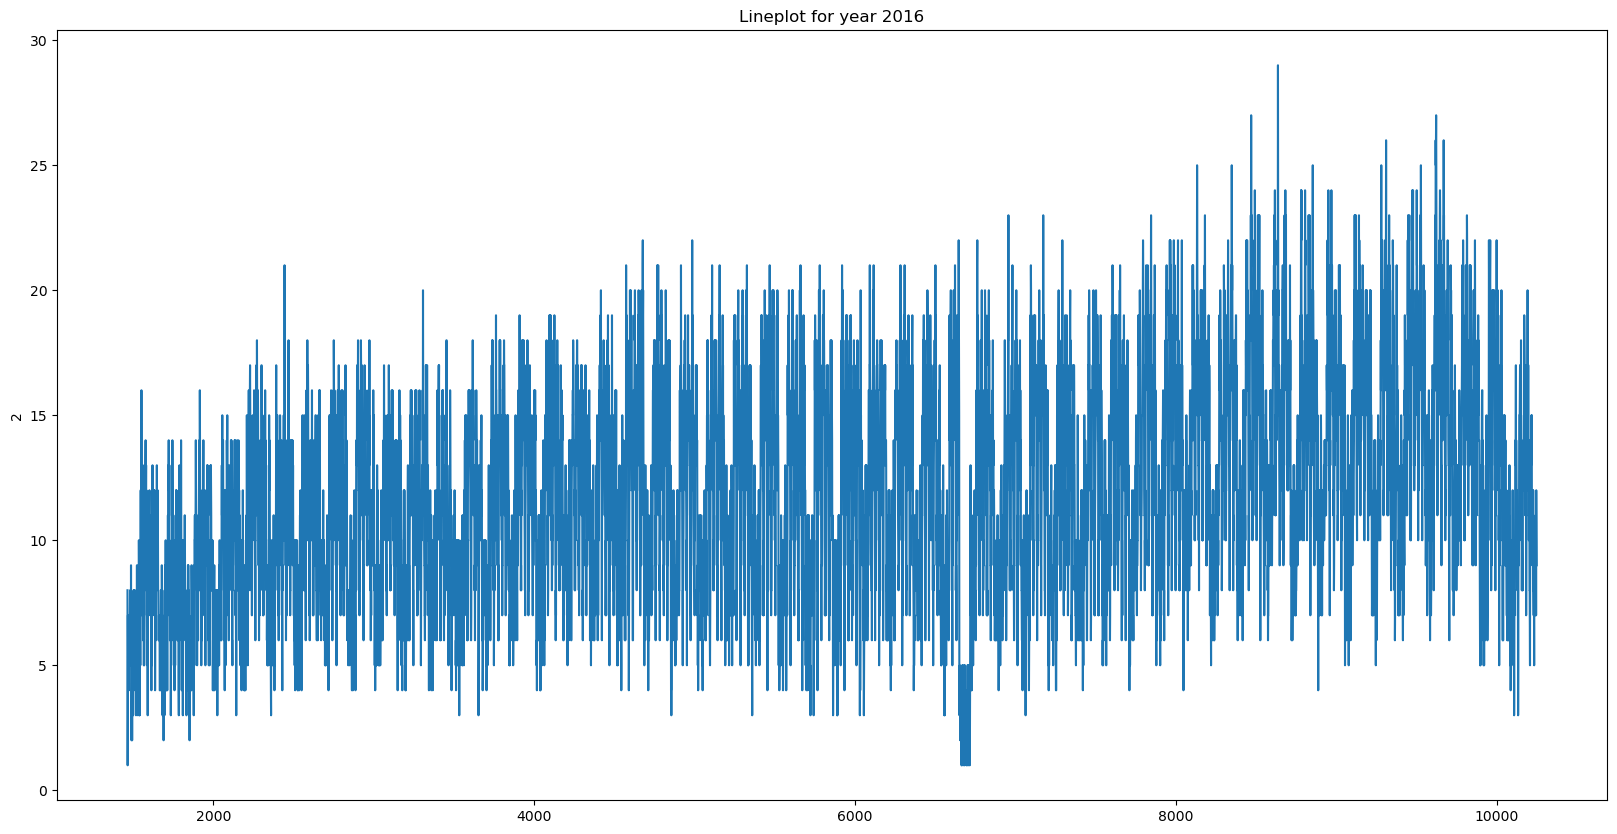

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


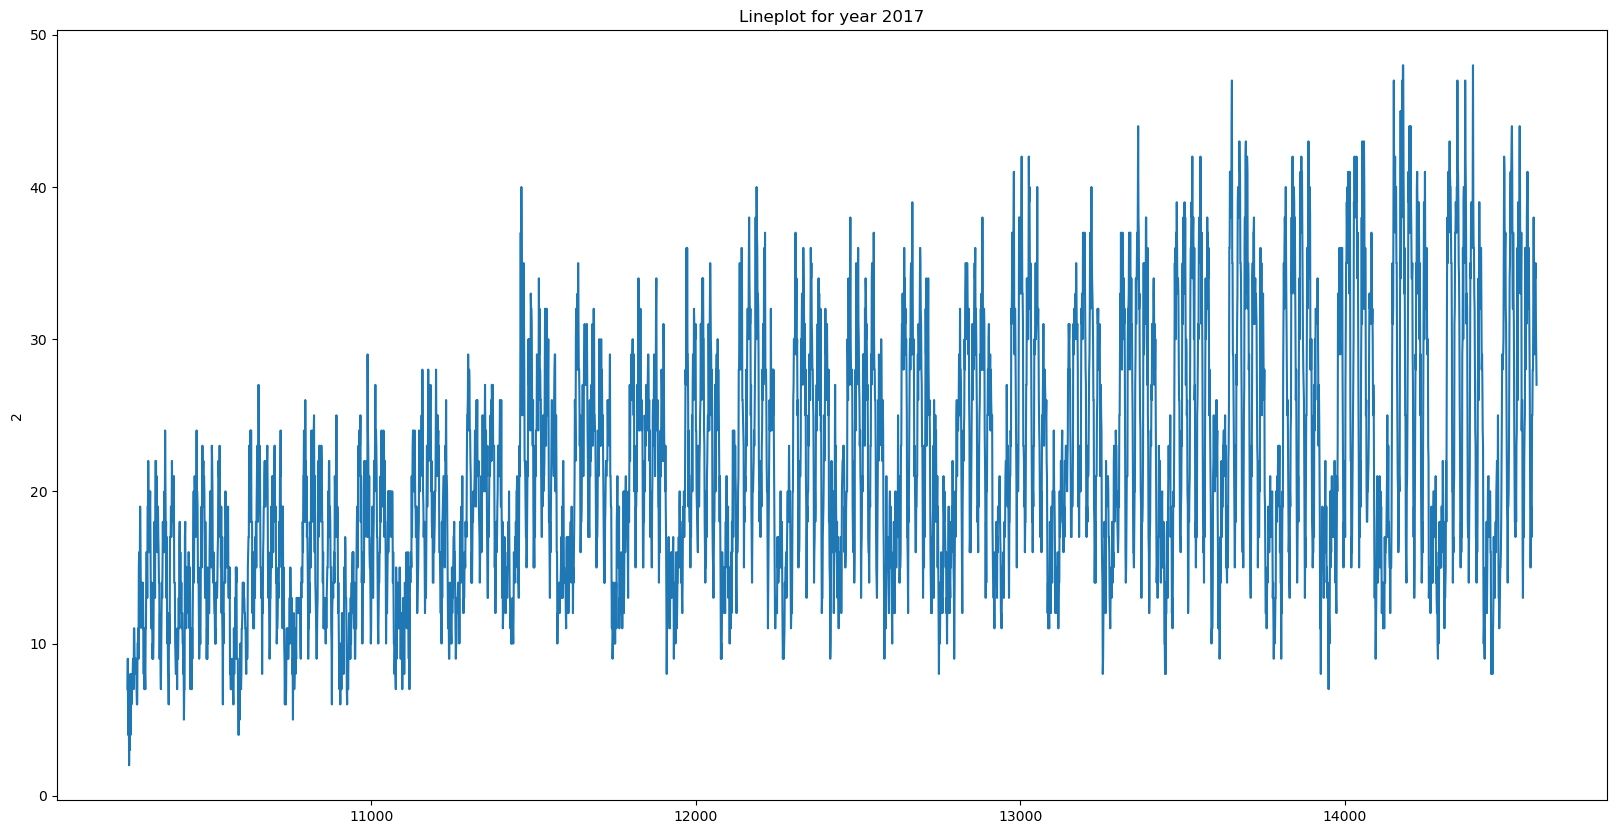

In [43]:
plot(df2,2)

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


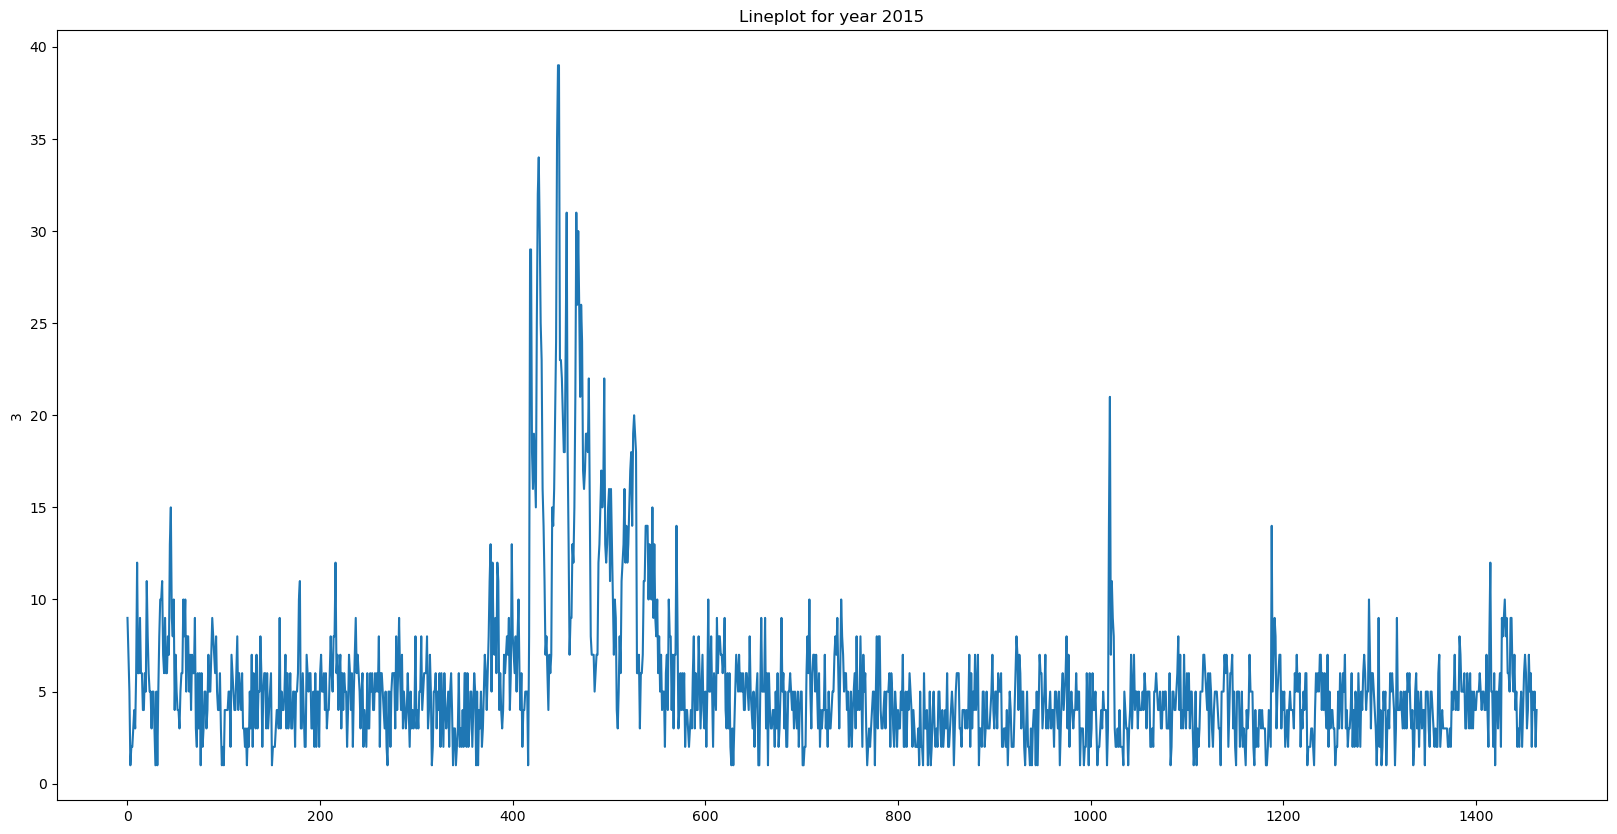

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


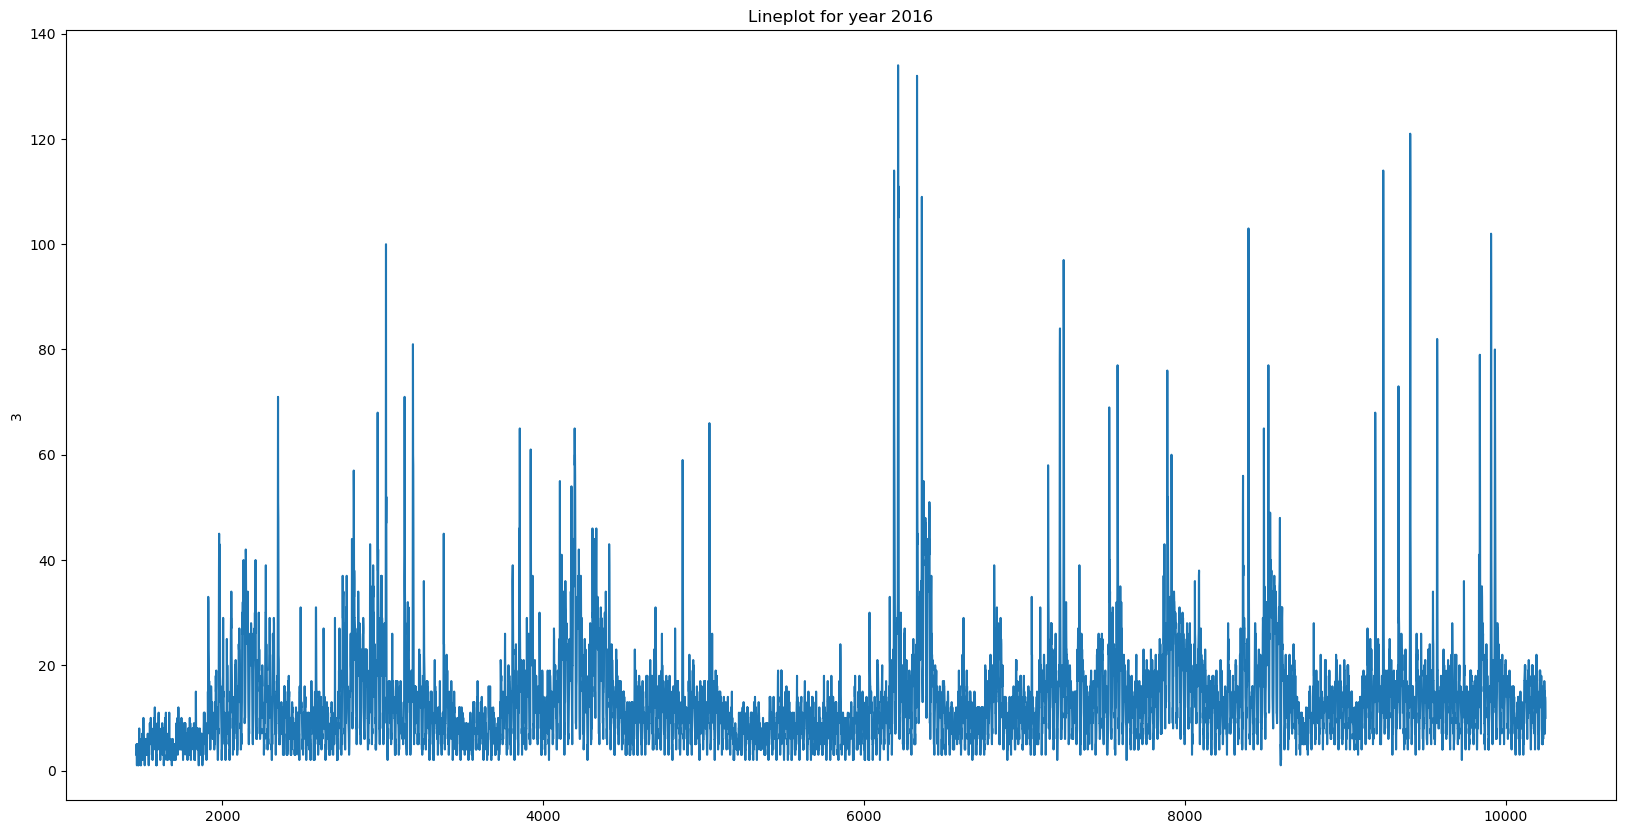

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


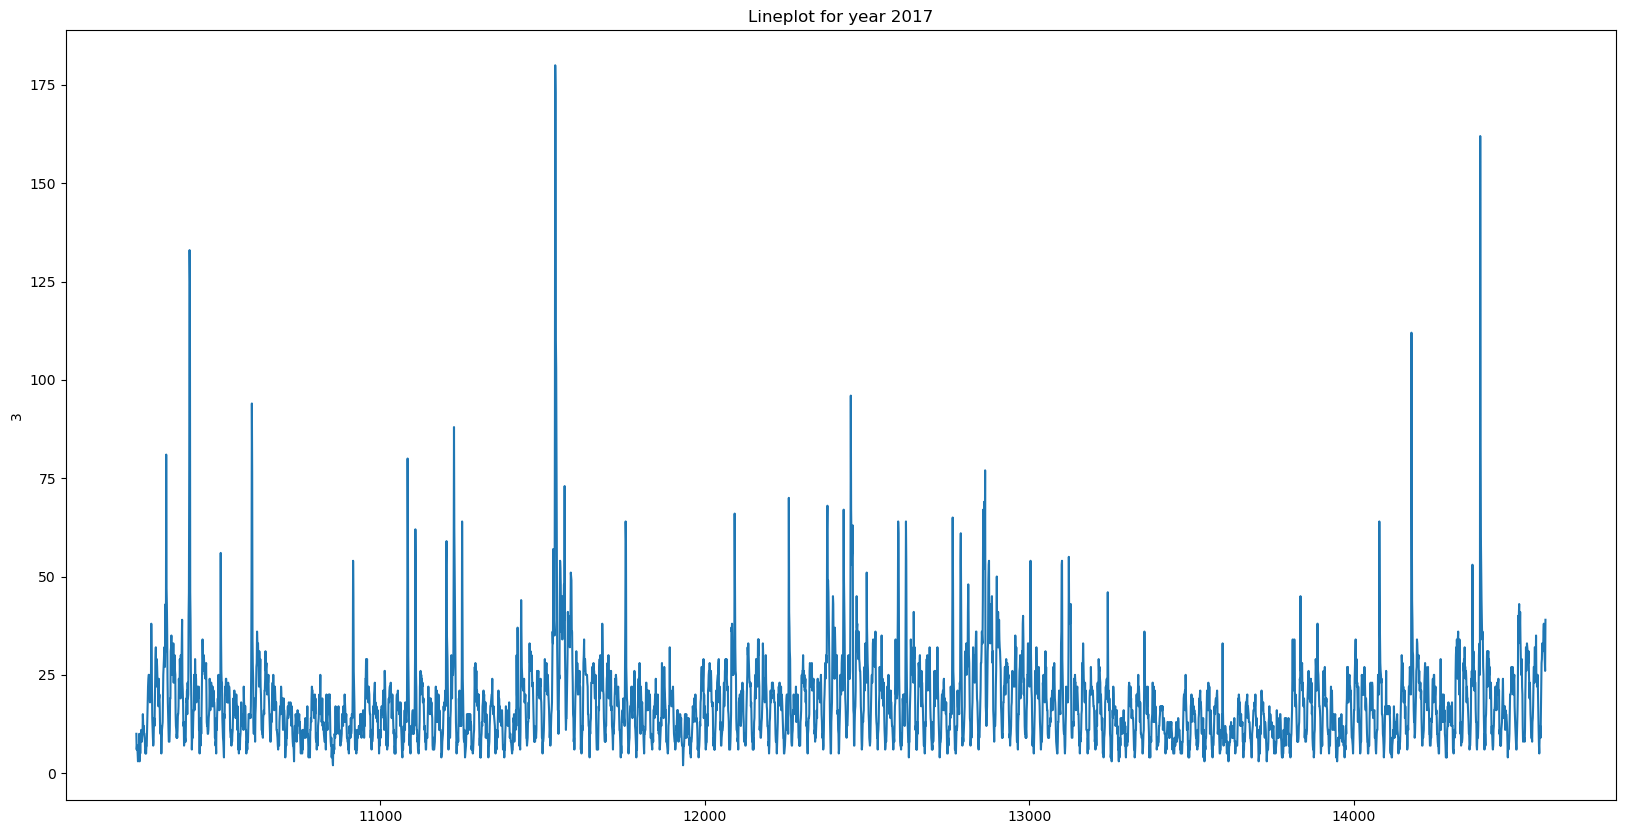

In [44]:
plot(df3,3)

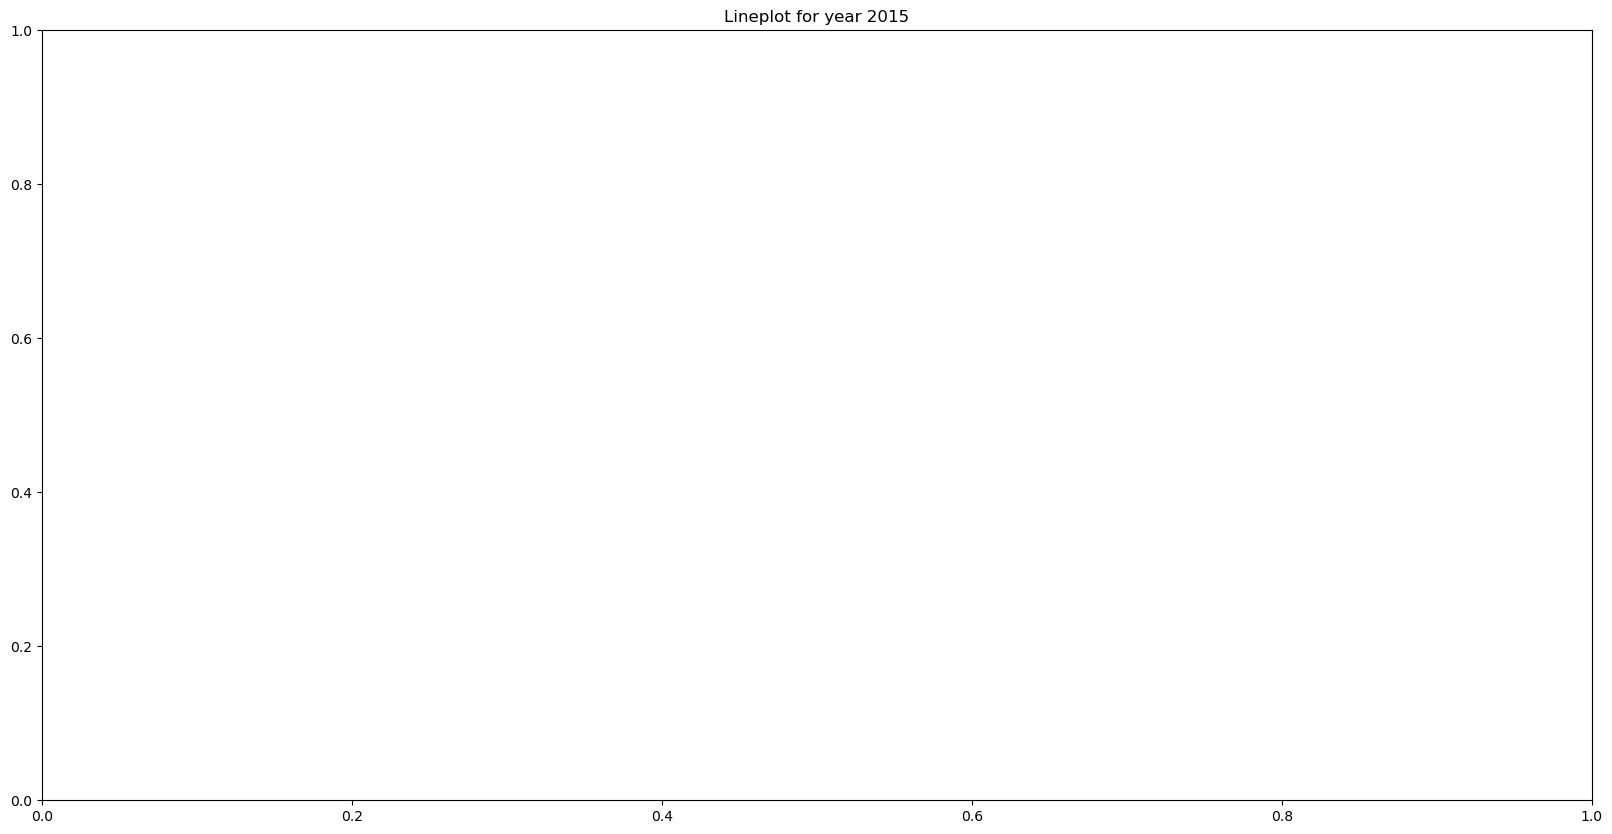

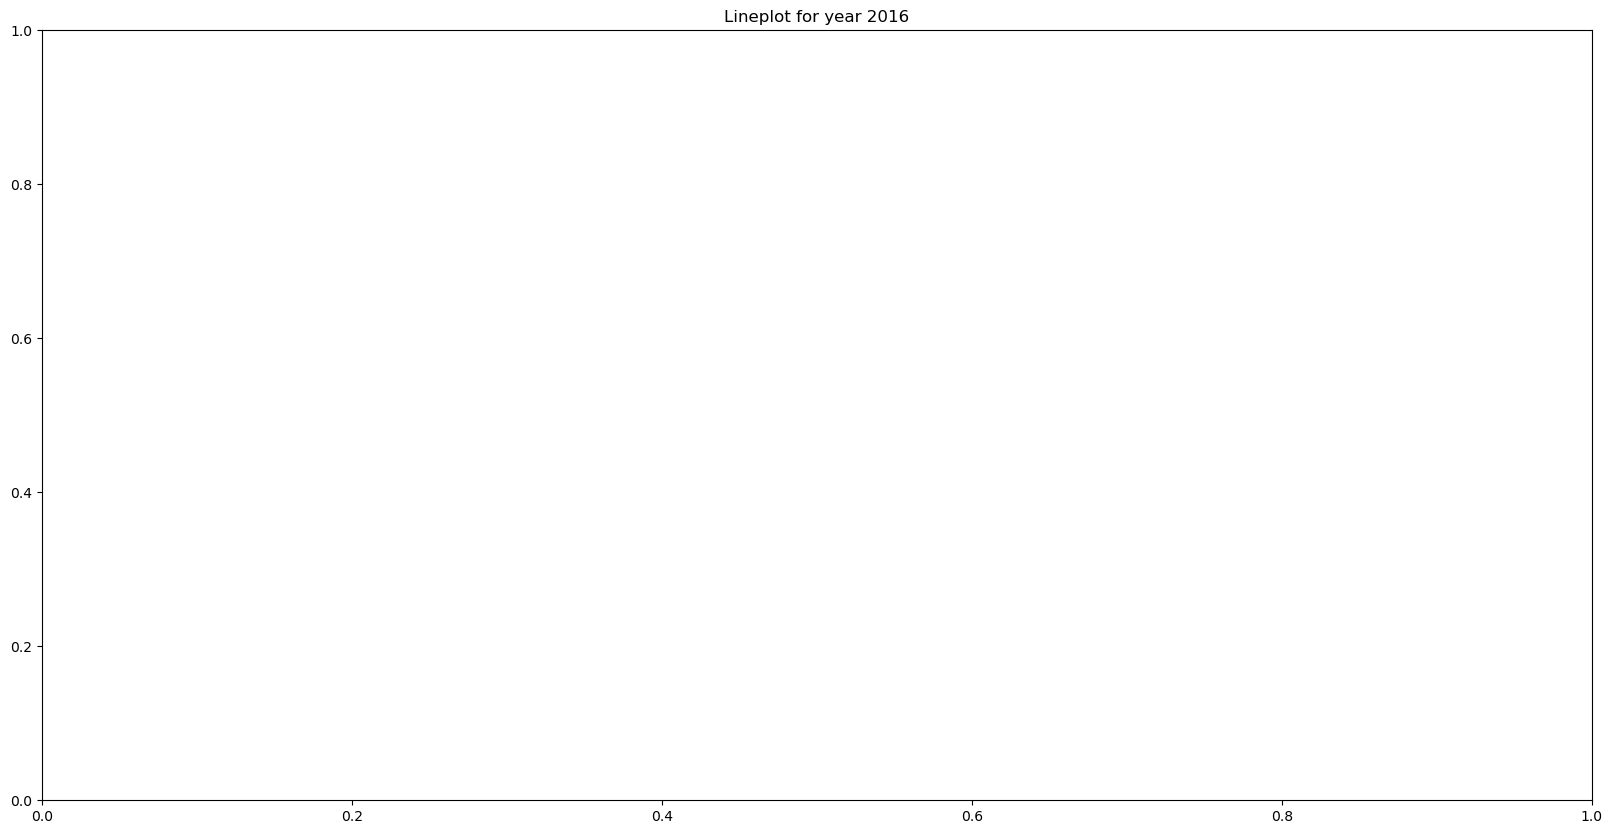

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


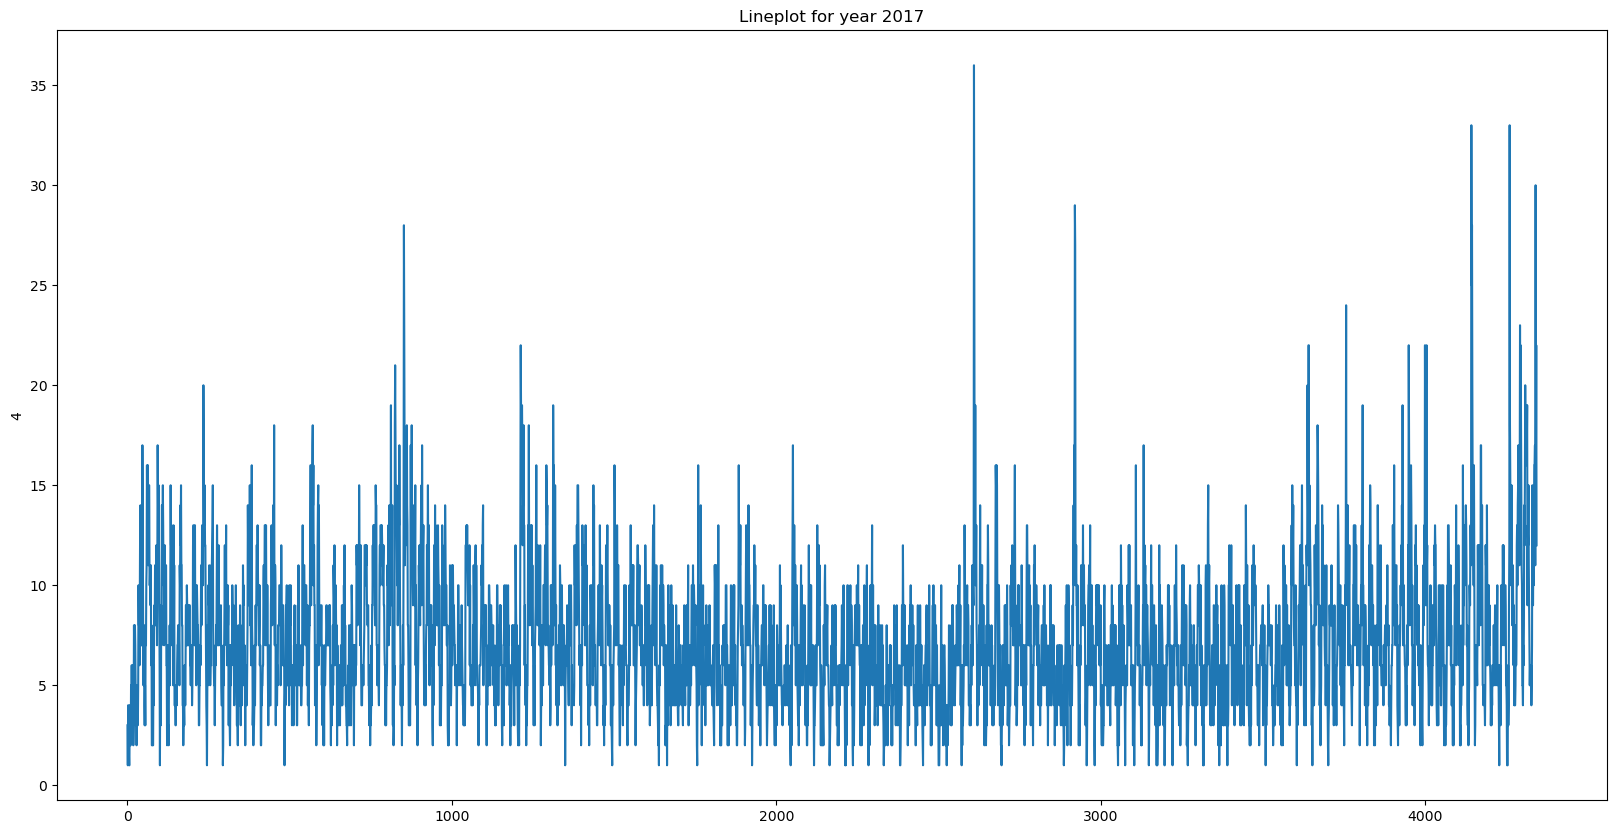

In [45]:
plot(df4,4)

In [46]:
def split(df):
    limit=int(len(df)*0.9)
    train=df[:limit]
    test=df[limit:]
    return train,test

In [47]:
train_1,test_1=split(df1)
train_2,test_2=split(df2)
train_3,test_3=split(df3)
train_4,test_4=split(df4)

In [48]:
from pandas.plotting import autocorrelation_plot

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

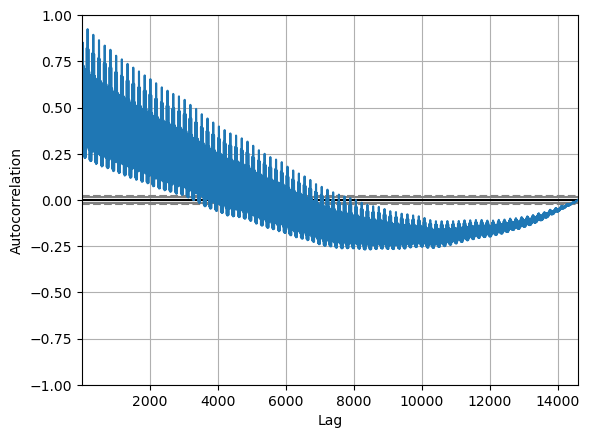

In [49]:
autocorrelation_plot(df1)

In [50]:
!pip install pmdarima  -q

In [51]:
from pmdarima.arima import auto_arima

In [52]:
from sklearn.metrics import mean_squared_error

In [53]:
model1=auto_arima(train_1,seasonal=False)

In [54]:
steps=len(test_1)

In [55]:
pred=model1.predict(n_periods=steps)

In [56]:
mse=mean_squared_error(test_1,pred)

In [57]:
rmse_1=np.sqrt(mse)

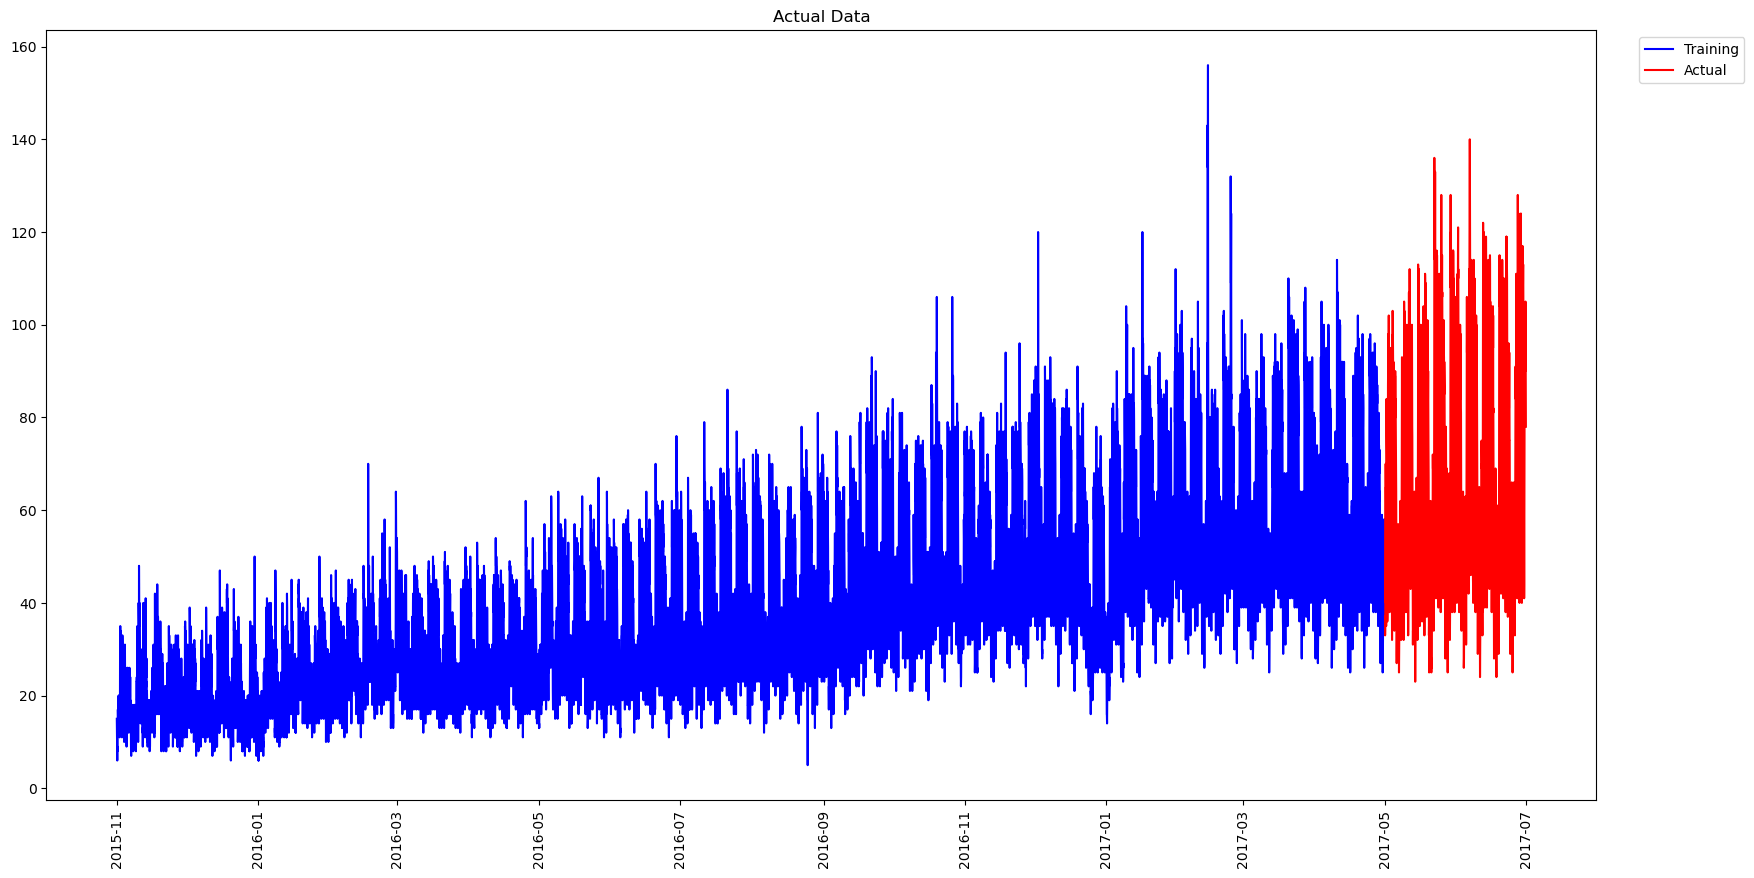

In [58]:
plt.figure(figsize=(20,10))
plt.plot(train_1.index,train_1[1],color='blue',label='Training')
plt.plot(test_1.index,test_1[1],color='red',label='Actual')
plt.xticks(rotation=90)
plt.title('Actual Data')
plt.legend(bbox_to_anchor=(1.1,1))
plt.show()

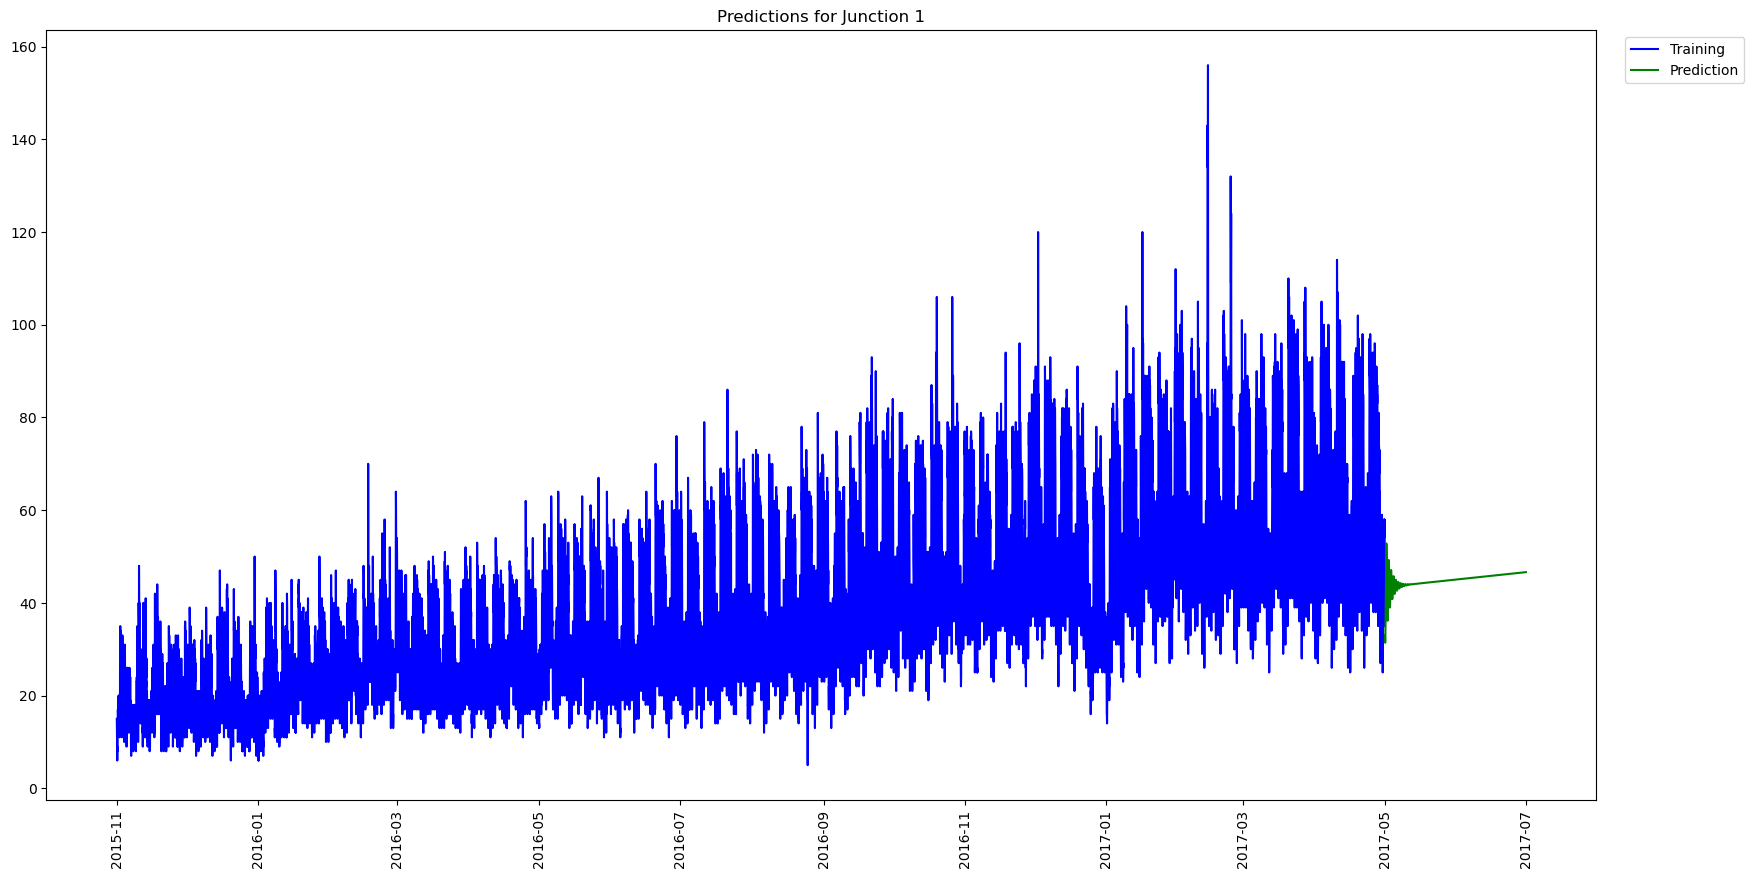

In [59]:
plt.figure(figsize=(20,10))
plt.plot(train_1.index,train_1[1],color='blue',label='Training')
plt.plot(test_1.index,pred,color='green',label='Prediction')
plt.xticks(rotation=90)
plt.title('Predictions for Junction 1')
plt.legend(bbox_to_anchor=(1.1,1))
plt.savefig('arima1.png')
plt.show()

In [60]:
from PIL import Image

In [61]:
img_1=Image.open('arima1.png')

In [62]:
model2=auto_arima(train_2,seasonal=True)

In [63]:
steps=len(test_2)

In [64]:
pred_2=model2.predict(n_periods=steps)

In [65]:
mse_2=mean_squared_error(test_2,pred_2)

In [66]:
rmse_2=np.sqrt(mse_2)

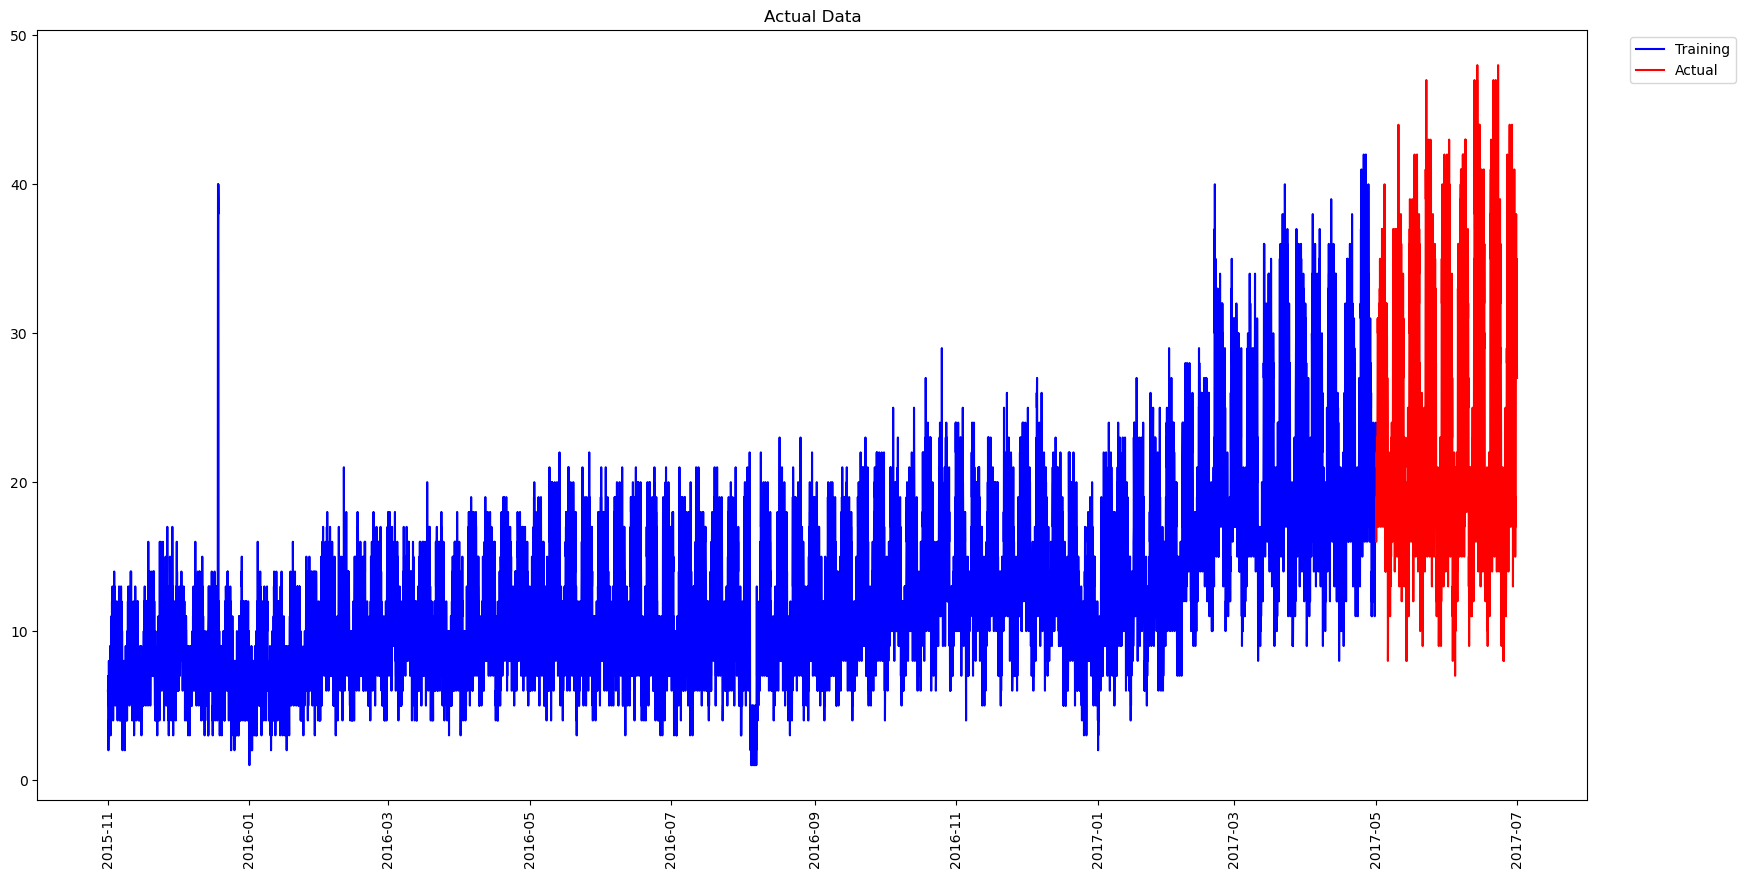

In [67]:
plt.figure(figsize=(20,10))
plt.plot(train_2.index,train_2[2],color='blue',label='Training')
plt.plot(test_2.index,test_2[2],color='red',label='Actual')
plt.xticks(rotation=90)
plt.title('Actual Data')
plt.legend(bbox_to_anchor=(1.1,1))
plt.show()

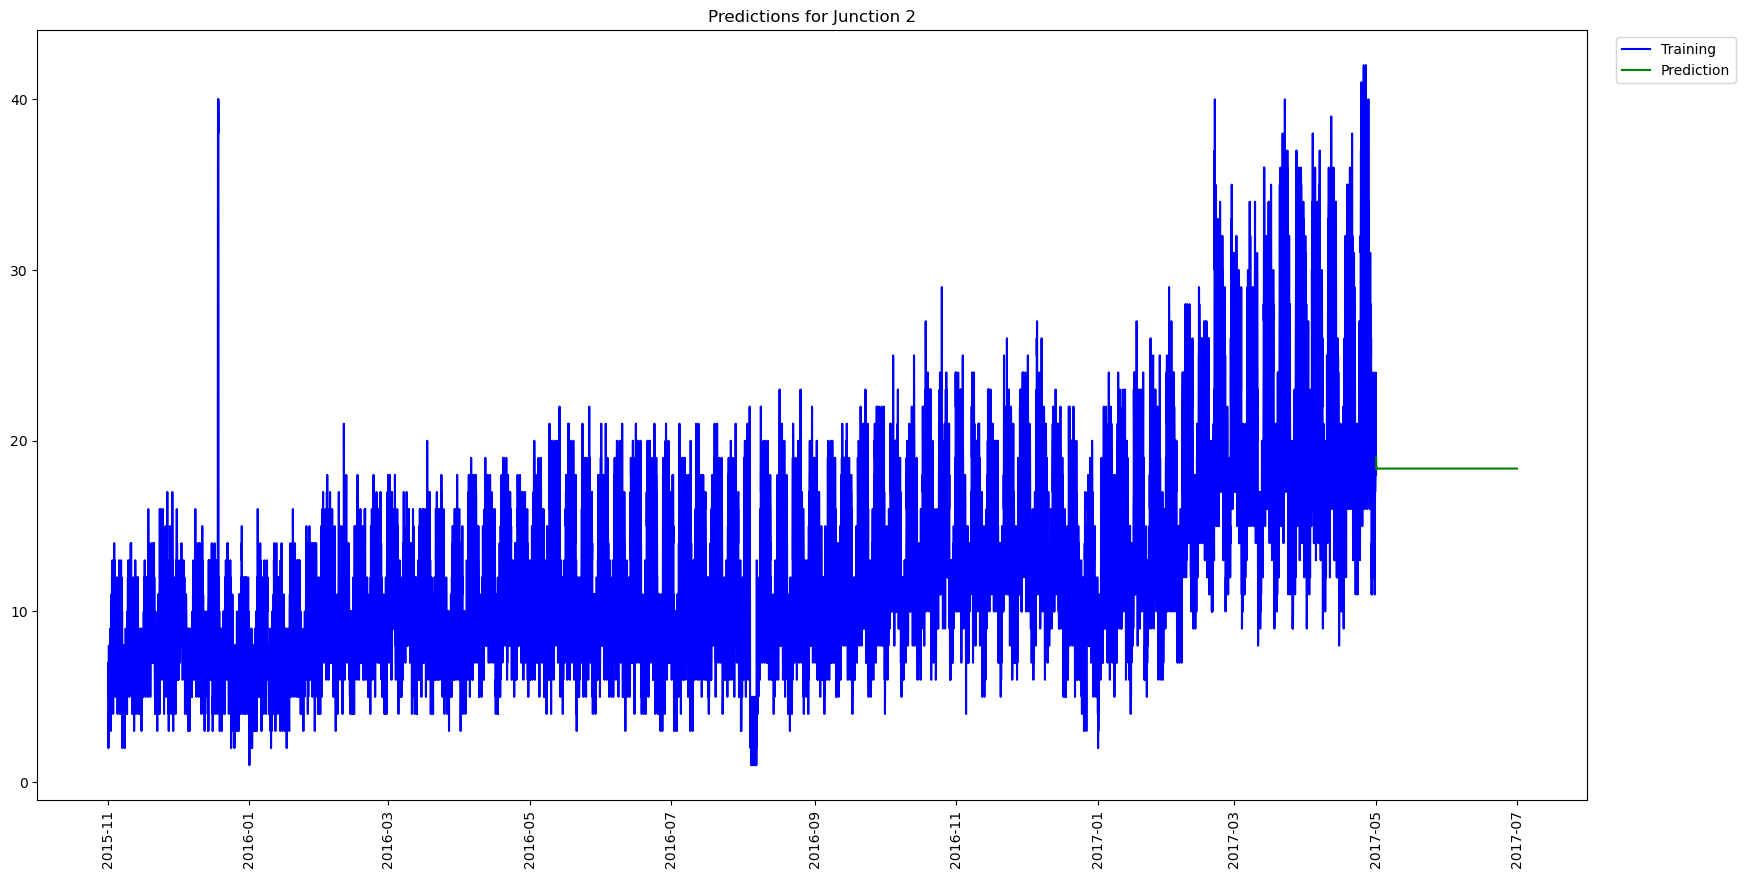

In [68]:
plt.figure(figsize=(20,10))
plt.plot(train_2.index,train_2[2],color='blue',label='Training')
plt.plot(test_2.index,pred_2,color='green',label='Prediction')
plt.xticks(rotation=90)
plt.title('Predictions for Junction 2')
plt.legend(bbox_to_anchor=(1.1,1))
plt.savefig('arima2.png')
plt.show()

In [69]:
img_2=Image.open('arima2.png')

In [70]:
model3=auto_arima(train_3,seasonal=True)

In [71]:
steps=len(test_3)

In [72]:
pred_3=model3.predict(n_periods=steps)

In [73]:
mse_3=mean_squared_error(test_3,pred_3)

In [74]:
rmse_3=np.sqrt(mse_3)

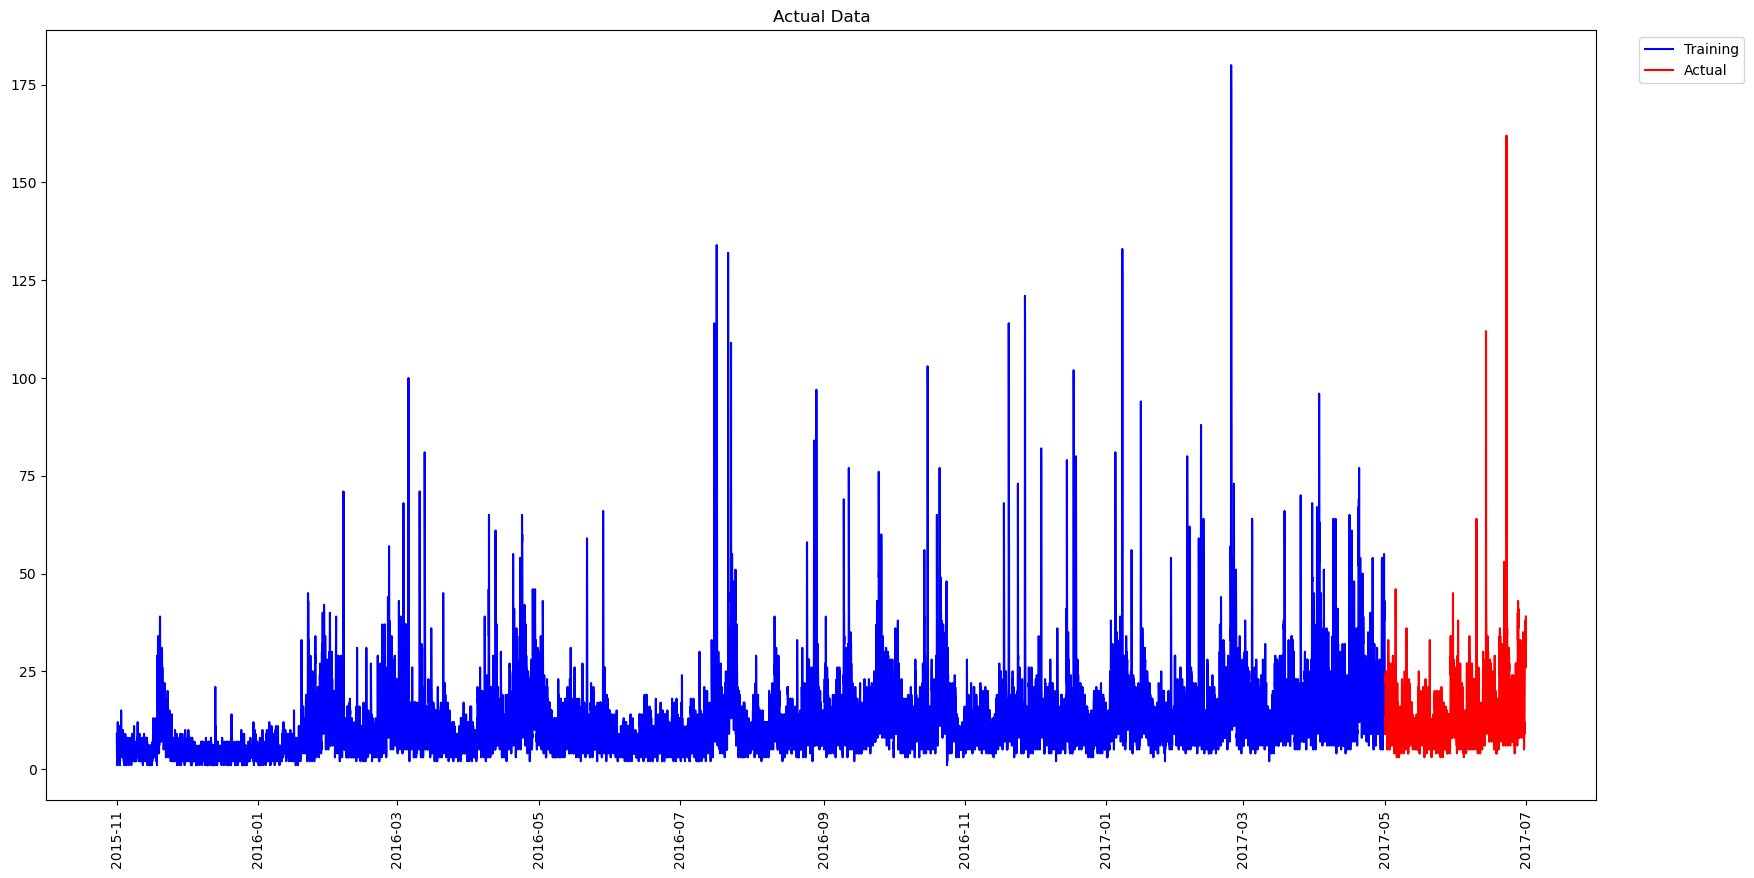

In [75]:
plt.figure(figsize=(20,10))
plt.plot(train_3.index,train_3[3],color='blue',label='Training')
plt.plot(test_3.index,test_3[3],color='red',label='Actual')
plt.xticks(rotation=90)
plt.title('Actual Data')
plt.legend(bbox_to_anchor=(1.1,1))
plt.show()

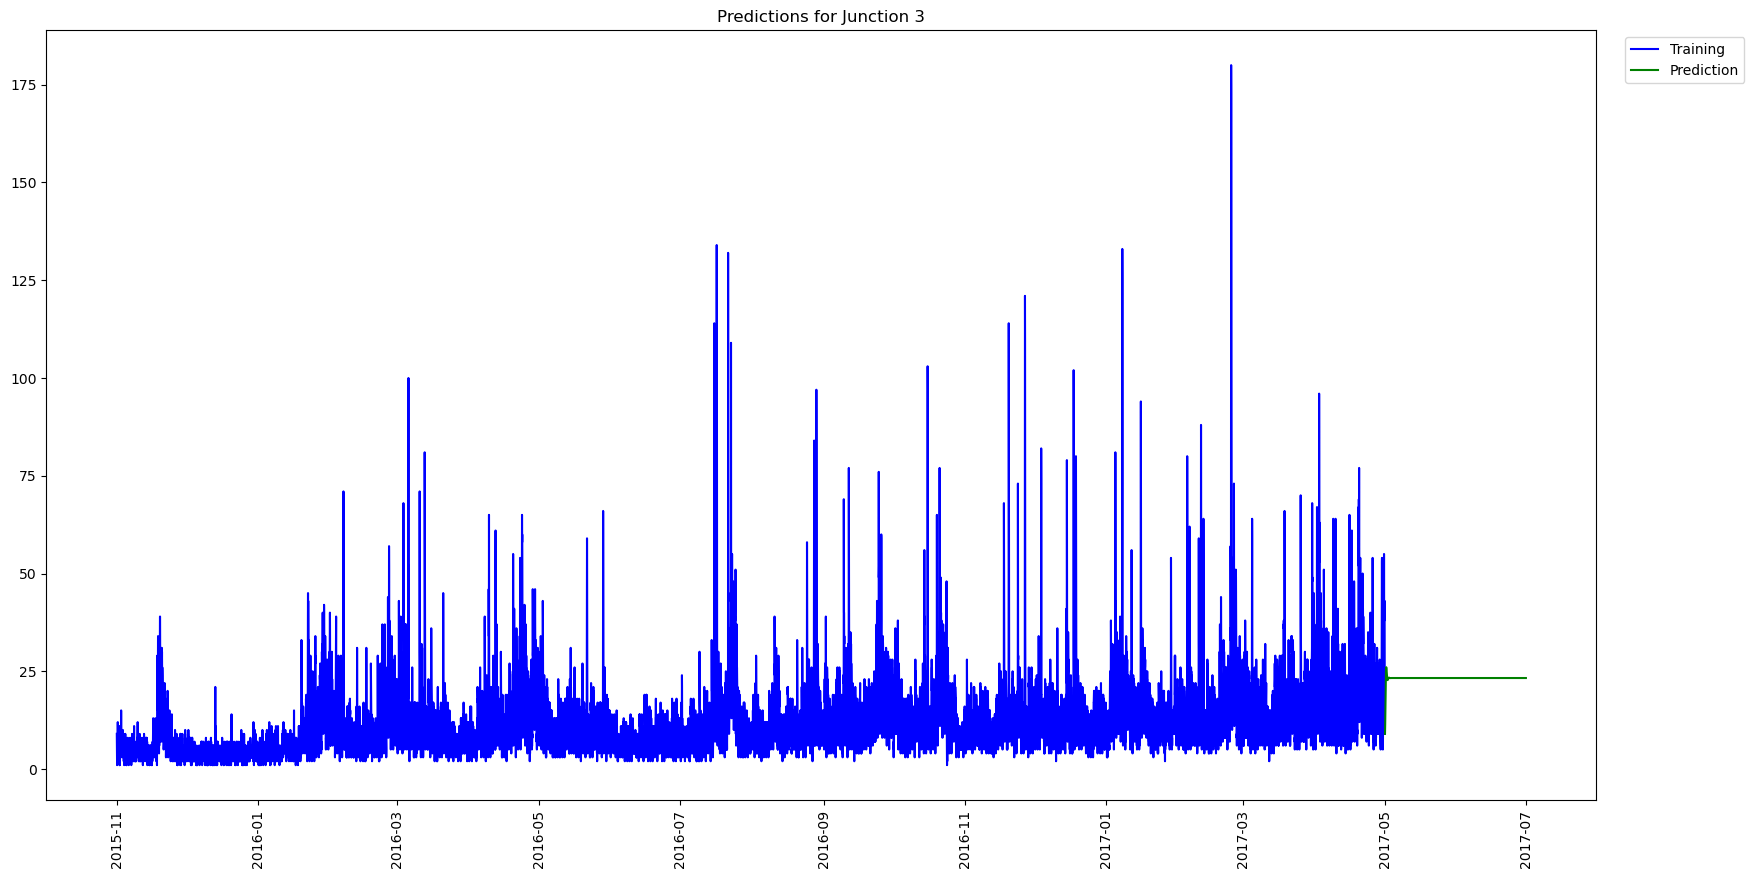

In [76]:
plt.figure(figsize=(20,10))
plt.plot(train_3.index,train_3[3],color='blue',label='Training')
plt.plot(test_3.index,pred_3,color='green',label='Prediction')
plt.xticks(rotation=90)
plt.title('Predictions for Junction 3')
plt.legend(bbox_to_anchor=(1.1,1))
plt.savefig('arima3.png')
plt.show()

In [77]:
img_3=Image.open('arima3.png')

In [78]:
model4=auto_arima(train_4,seasonal=False)

In [79]:
steps=len(test_4)

In [80]:
pred_4=model4.predict(n_periods=steps)

In [81]:
mse_4=mean_squared_error(test_4,pred_4)

In [82]:
rmse_4=np.sqrt(mse_4)

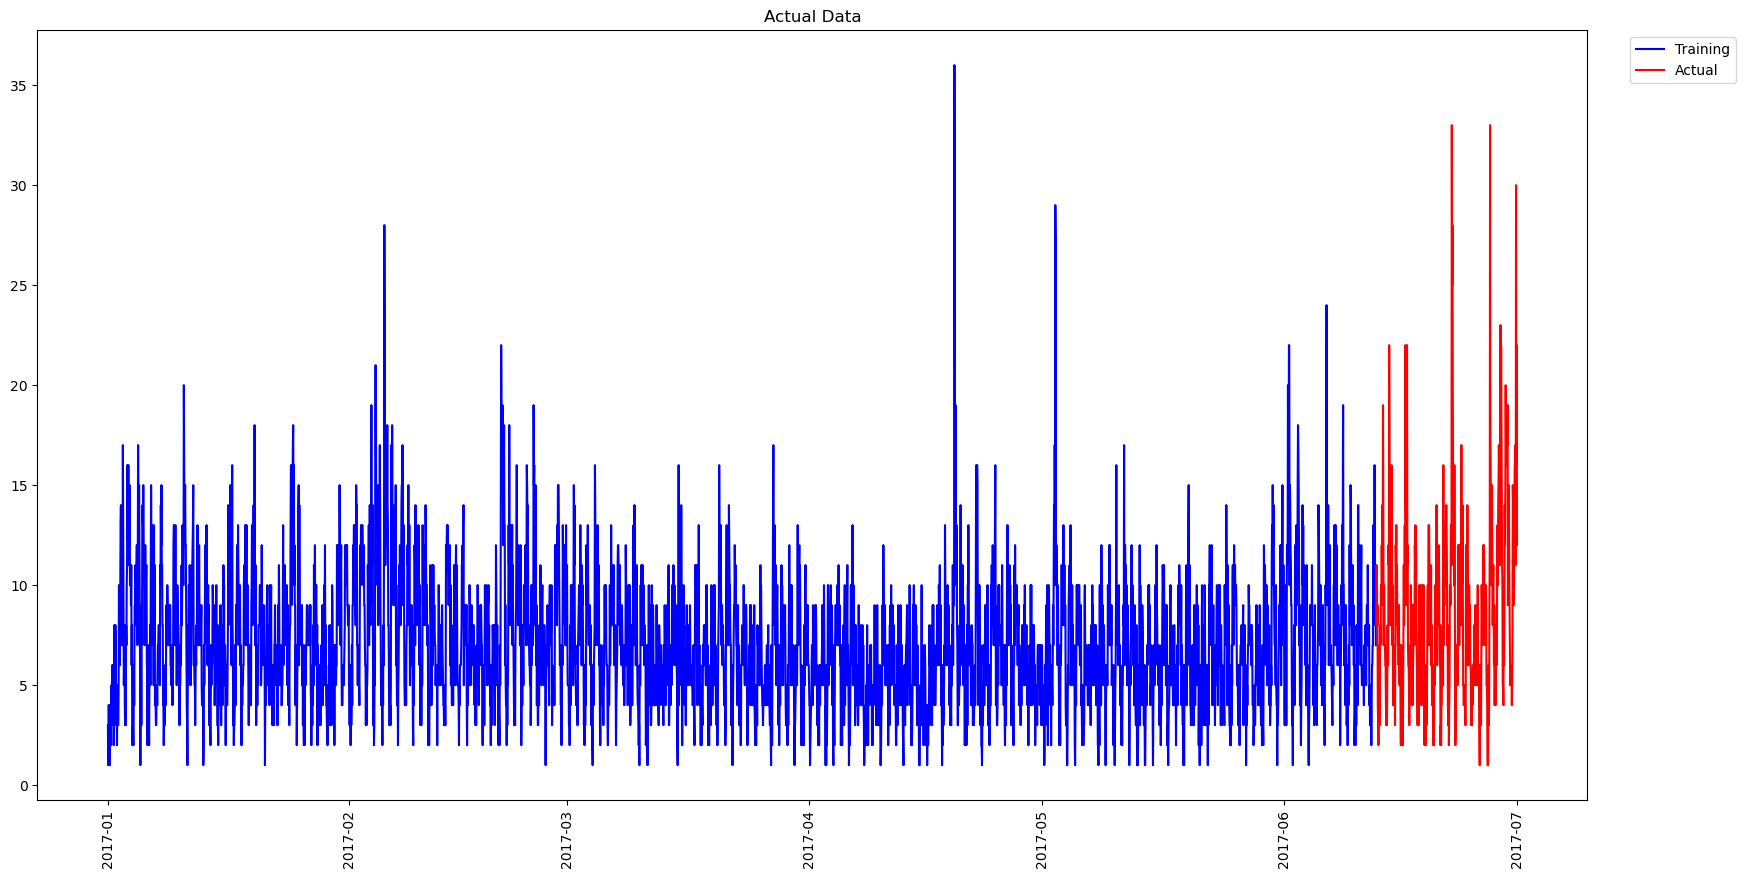

In [83]:
plt.figure(figsize=(20,10))
plt.plot(train_4.index,train_4[4],color='blue',label='Training')
plt.plot(test_4.index,test_4[4],color='red',label='Actual')
plt.xticks(rotation=90)
plt.title('Actual Data')
plt.legend(bbox_to_anchor=(1.1,1))
plt.show()

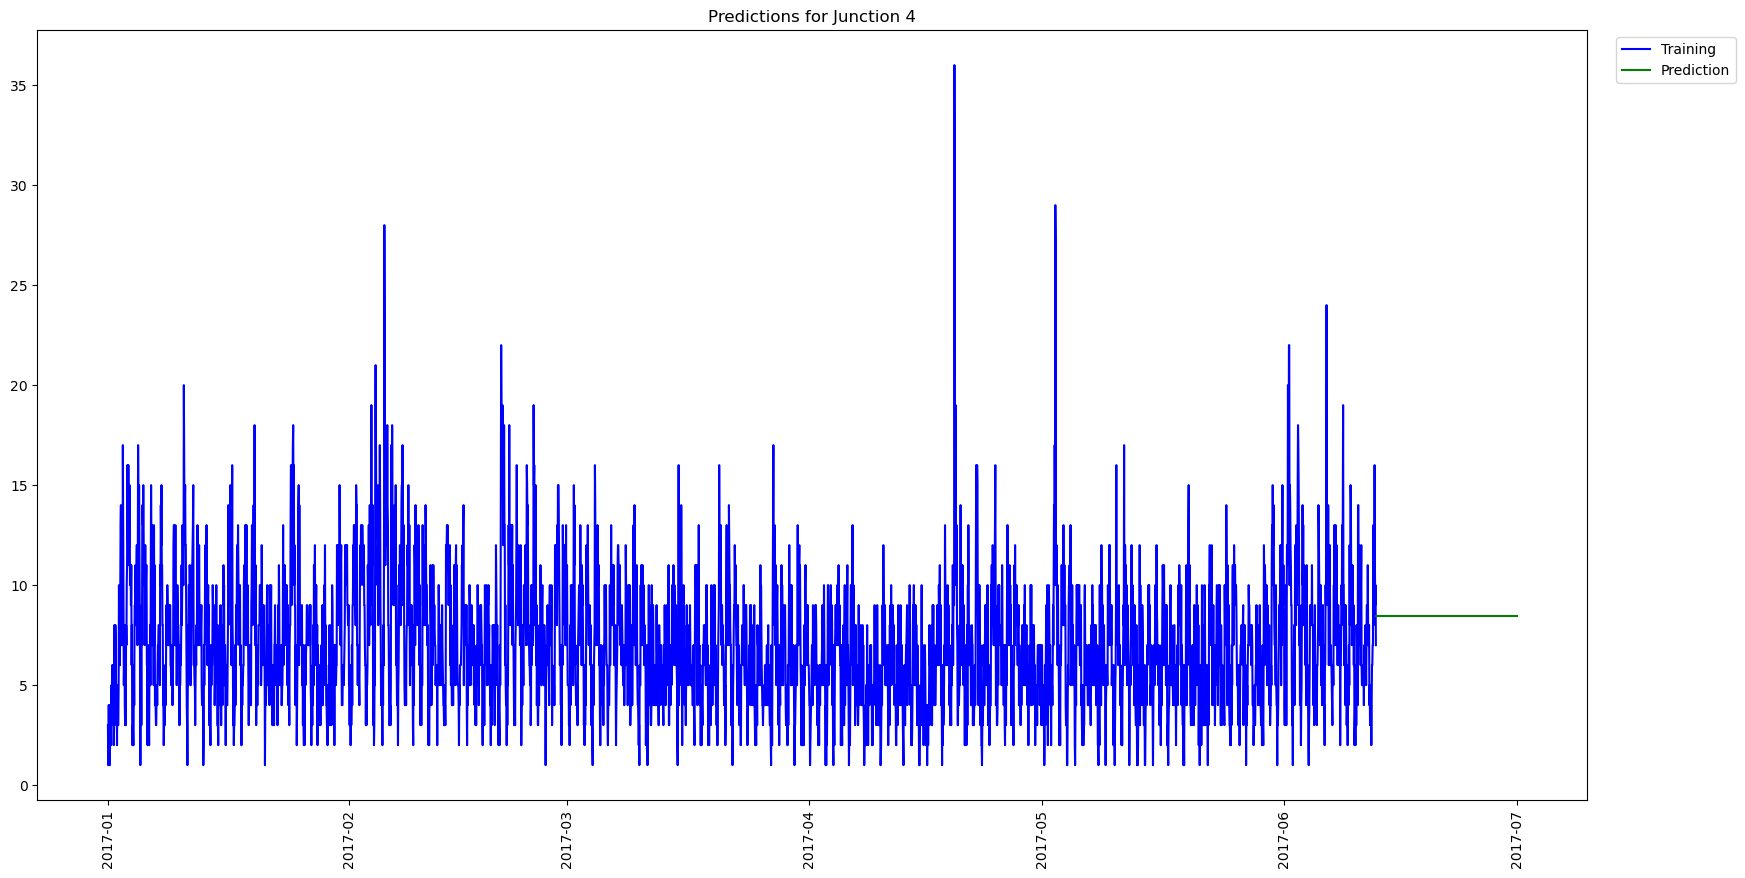

In [84]:
plt.figure(figsize=(20,10))
plt.plot(train_4.index,train_4[4],color='blue',label='Training')
plt.plot(test_4.index,pred_4,color='green',label='Prediction')
plt.xticks(rotation=90)
plt.title('Predictions for Junction 4')
plt.legend(bbox_to_anchor=(1.1,1))
plt.savefig('arima4.png')
plt.show()

In [85]:
img_4=Image.open('arima4.png')

In [86]:
test=test[['DateTime','Junction']]
d1=test[test['Junction']==1].set_index('DateTime')
d2=test[test['Junction']==2].set_index('DateTime')
d3=test[test['Junction']==3].set_index('DateTime')
d4=test[test['Junction']==4].set_index('DateTime')

In [87]:
n1=len(d1)
n2=len(d2)
n3=len(d3)
n4=len(d4)

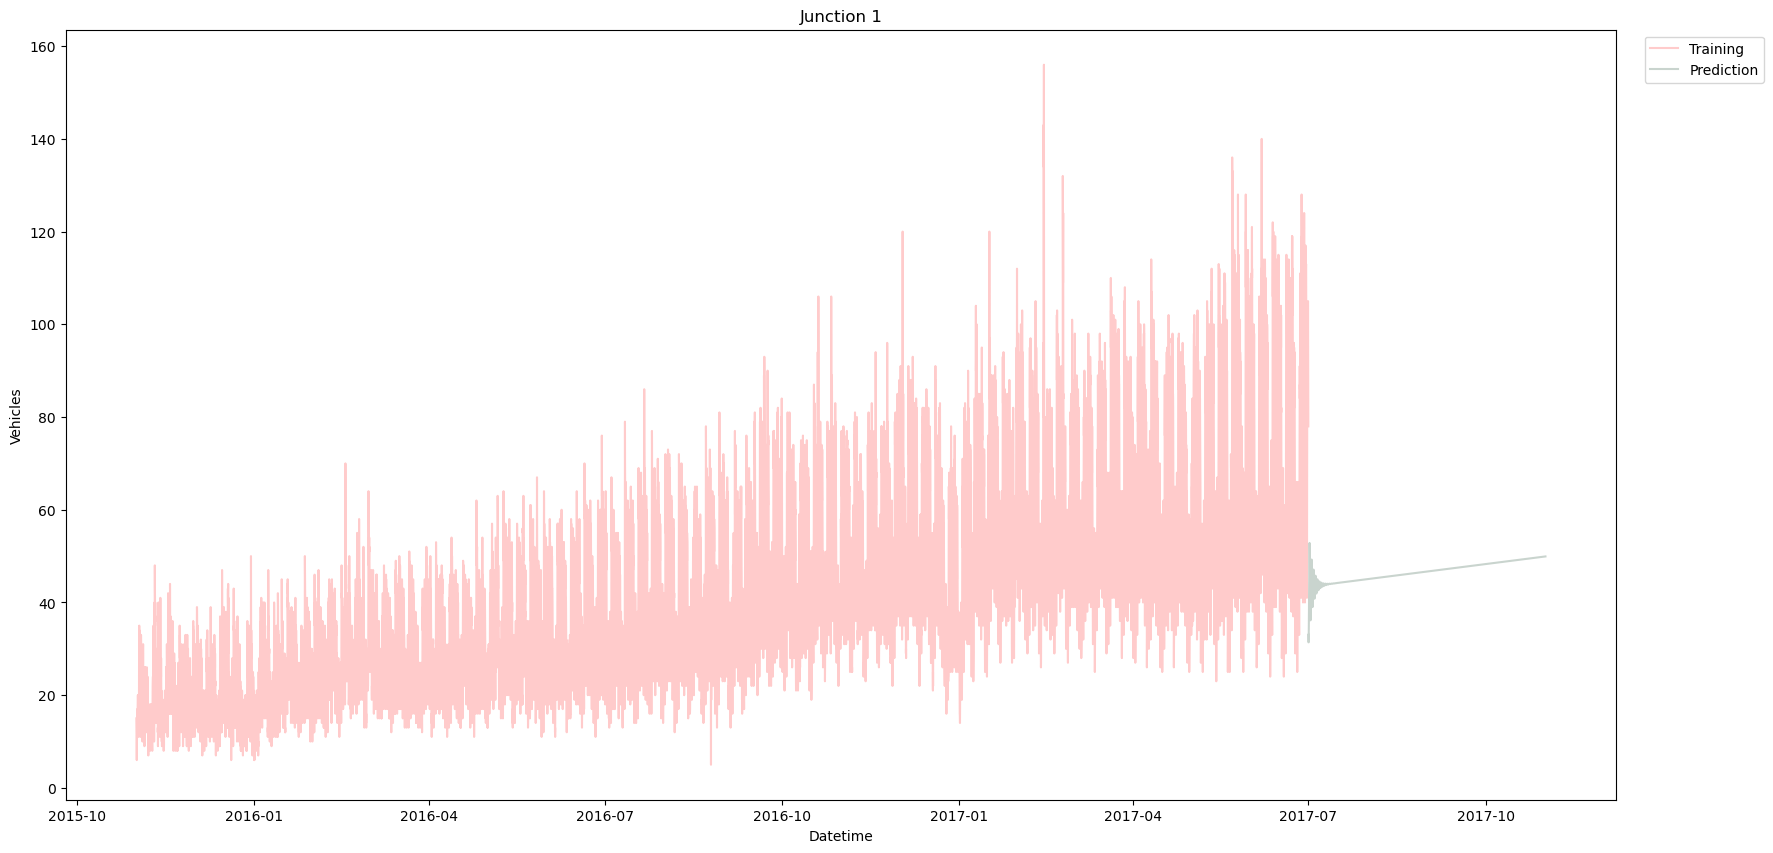

In [89]:
plt.figure(figsize=(20,10))
plt.plot(df1.index,df1[1],color='#FFCBCB',label='Training')
plt.plot(d1.index,model1.predict(n_periods=n1),color='#C9D4CE',label='Prediction')
plt.legend(bbox_to_anchor=(1.1,1))
plt.ylabel('Vehicles')
plt.xlabel('Datetime')
plt.title('Junction 1')
plt.savefig('test1.png')
plt.show()

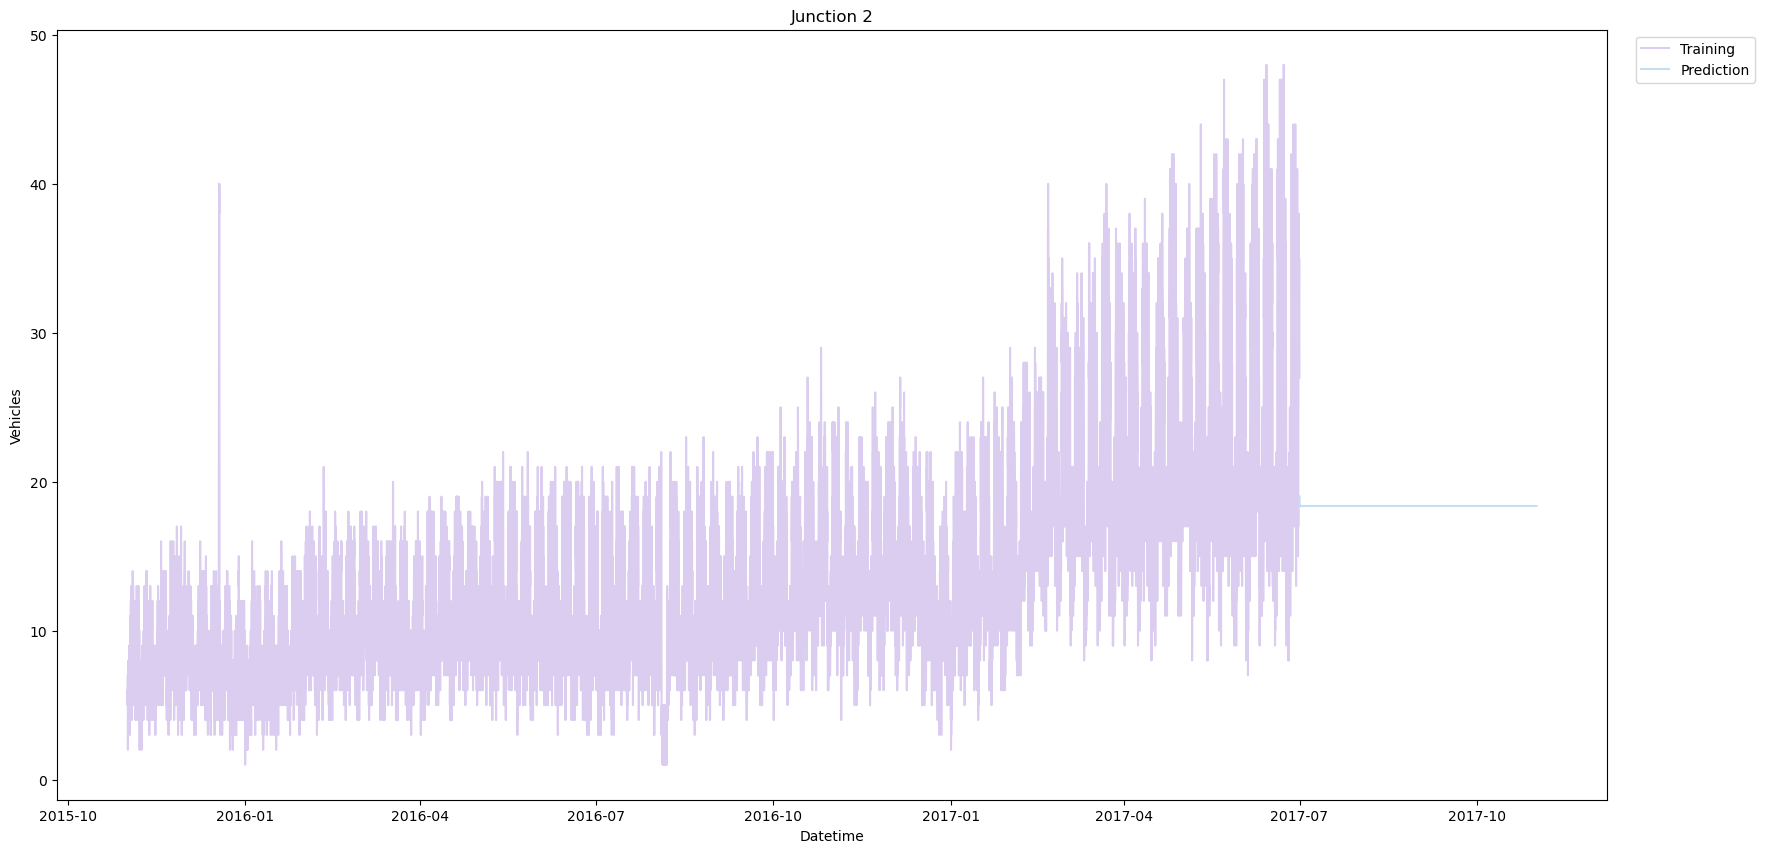

In [90]:
plt.figure(figsize=(20,10))
plt.plot(df2.index,df2[2],color='#DBCDF0',label='Training')
plt.plot(d2.index,model2.predict(n_periods=n2),color='#C6DEF1',label='Prediction')
plt.legend(bbox_to_anchor=(1.1,1))
plt.ylabel('Vehicles')
plt.xlabel('Datetime')
plt.title('Junction 2')
plt.savefig('test2.png')
plt.show()

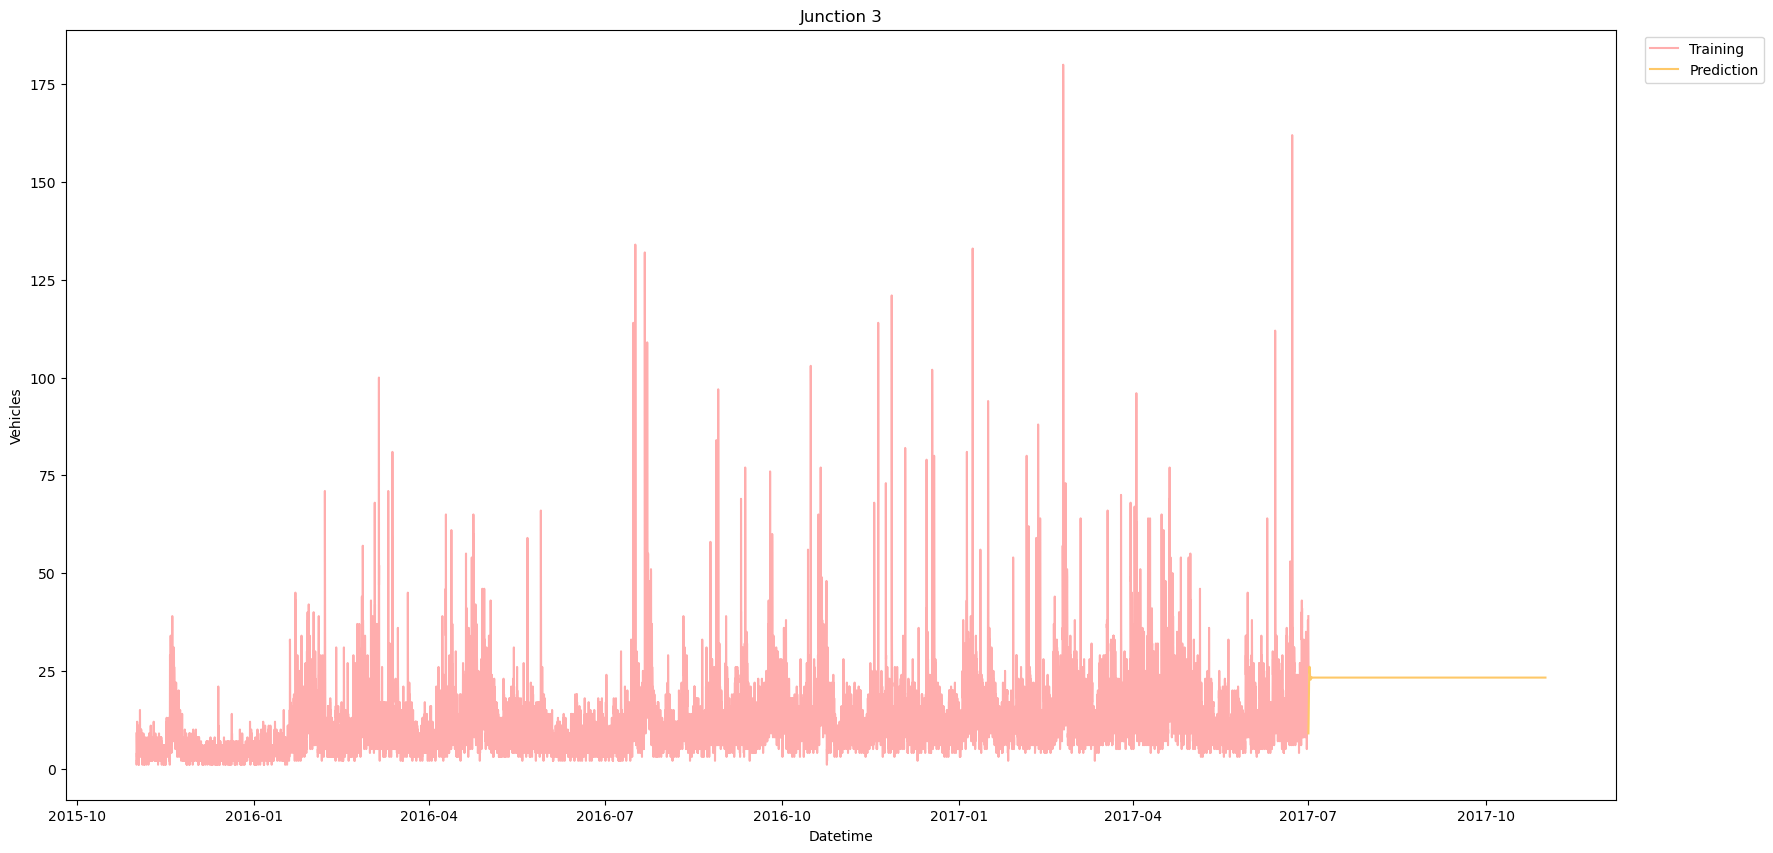

In [92]:
plt.figure(figsize=(20,10))
plt.plot(df3.index,df3[3],color='#FFADAD',label='Training')
plt.plot(d3.index,model3.predict(n_periods=n3),color='#FEC868',label='Prediction')
plt.legend(bbox_to_anchor=(1.1,1))
plt.ylabel('Vehicles')
plt.xlabel('Datetime')
plt.title('Junction 3')
plt.savefig('test3.png')
plt.show()

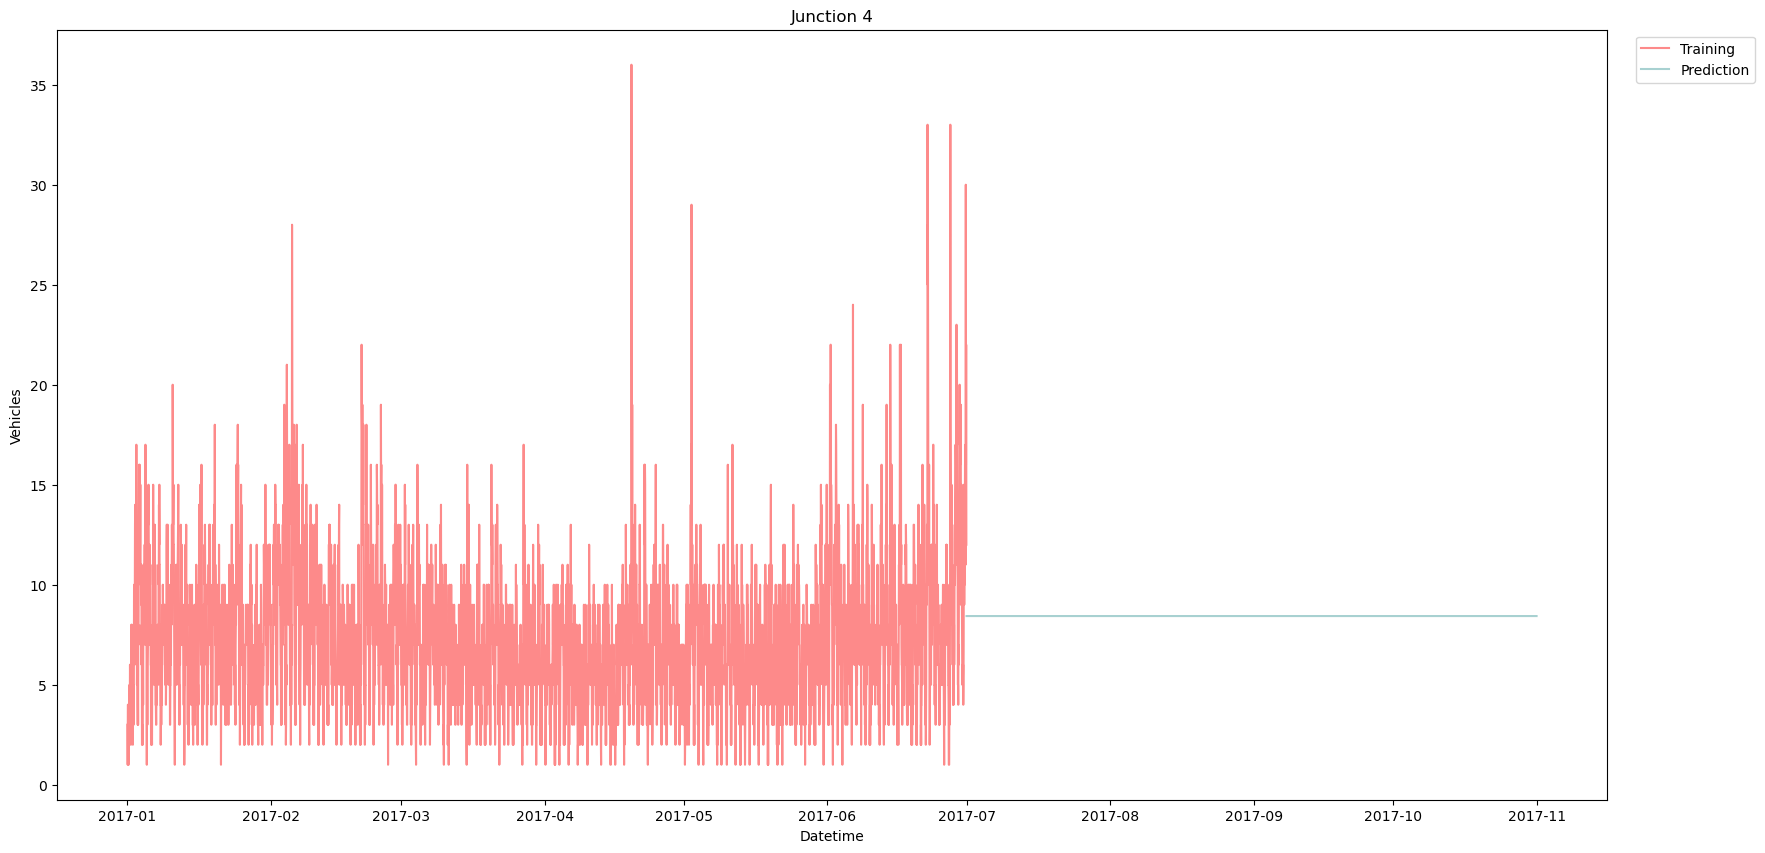

In [91]:
plt.figure(figsize=(20,10))
plt.plot(df4.index,df4[4],color='#FD8A8A',label='Training')
plt.plot(d4.index,model4.predict(n_periods=n4),color='#A8D1D1',label='Prediction')
plt.legend(bbox_to_anchor=(1.1,1))
plt.ylabel('Vehicles')
plt.xlabel('Datetime')
plt.title('Junction 4')
plt.savefig('test4.png')
plt.show()